## Project 3 : Predictive Analysis on Employee Attrition

### About Dataset

**Context**

The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. Watson Analytics is going to help.

**Content**

I have data about past and current employees in a spreadsheet on my desk top. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

**Columns**

* Age                         
* Attrition                   
* BusinessTravel              
* DailyRate                   
* Department                  
* DistanceFromHome            
* Education                   
* EducationField              
* EmployeeCount               
* EmployeeNumber              
* EnvironmentSatisfaction     
* Gender                      
* HourlyRate                  
* JobInvolvement              
* JobLevel                    
* JobRole                     
* JobSatisfaction             
* MaritalStatus               
* MonthlyIncome               
* MonthlyRate                 
* NumCompaniesWorked          
* Over18                      
* OverTime                    
* PercentSalaryHike           
* PerformanceRating           
* RelationshipSatisfaction    
* StandardHours               
* StockOptionLevel            
* TotalWorkingYears           
* TrainingTimesLastYear       
* WorkLifeBalance             
* YearsAtCompany              
* YearsInCurrentRole          
* YearsSinceLastPromotion
* YearsWithCurrManager

### The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Attrition.csv')

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
num_col = df.select_dtypes(include = ['int','float']).columns
num_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
cat_col = df.select_dtypes(exclude = ['int','float']).columns
cat_col

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [9]:
df[num_col].nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [10]:
df[cat_col].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [11]:
con_col = []
num_cat_col= []

for i in num_col:
    if df[i].nunique()<20:
        num_cat_col.append(i)
    else:
        con_col.append(i)
print(con_col) 
print(num_cat_col)

['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [15]:
len(con_col)

9

In [12]:
cat_col = cat_col.to_list()

In [13]:
cat_col = cat_col+num_cat_col

In [14]:
cat_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
## Univeriate Analysis of Numerical Column

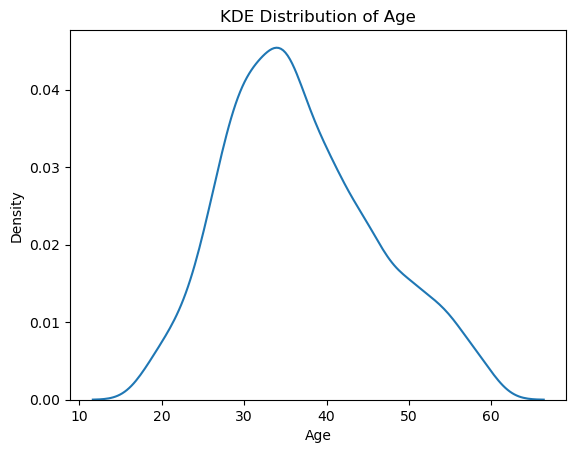

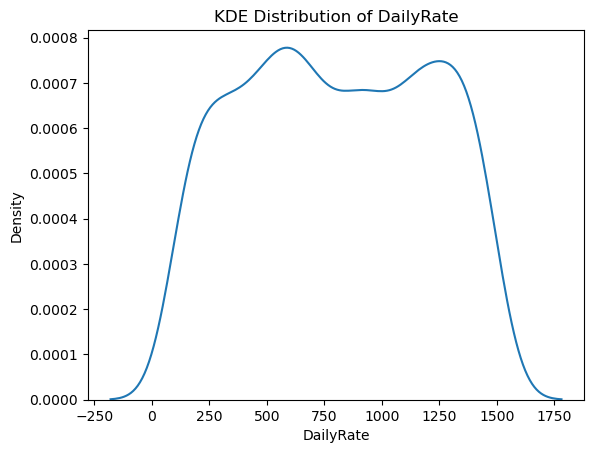

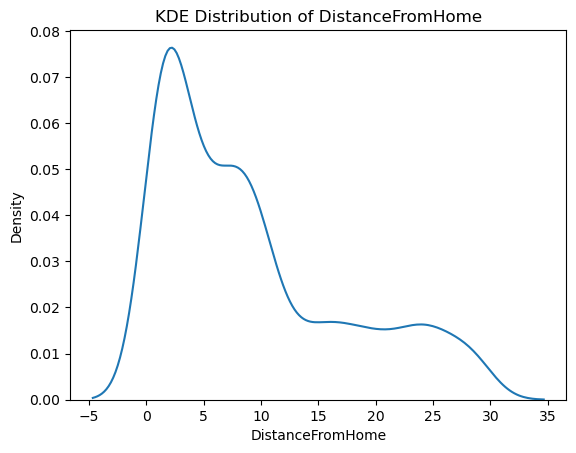

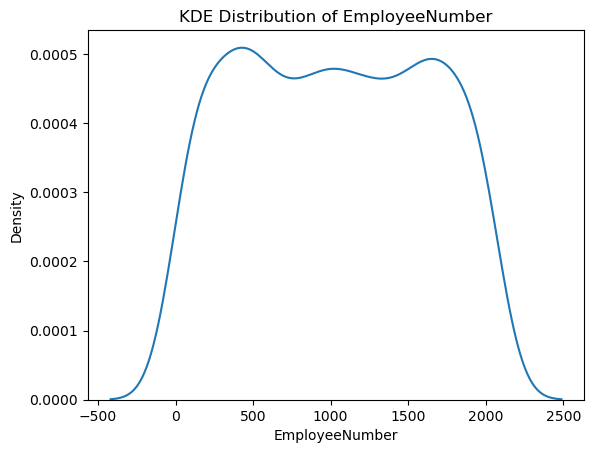

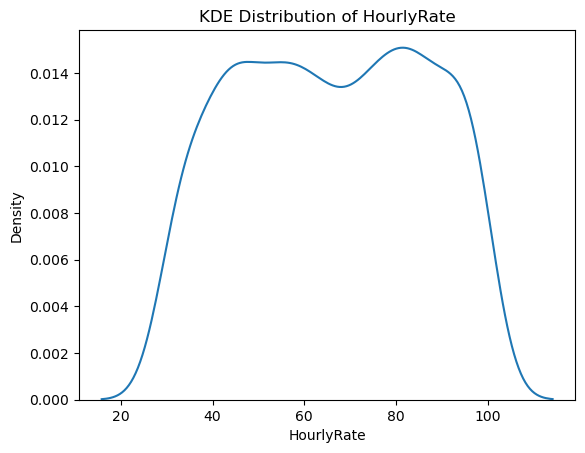

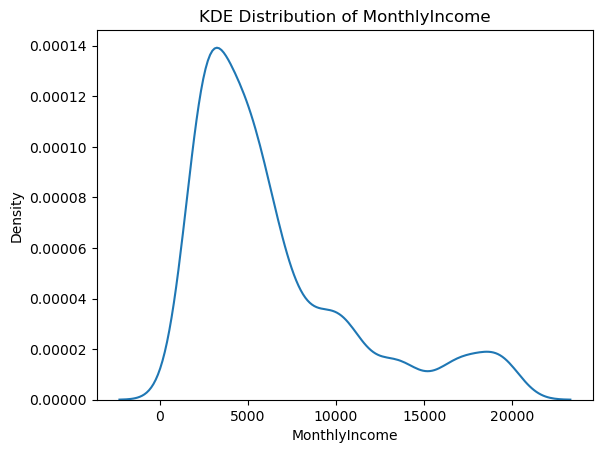

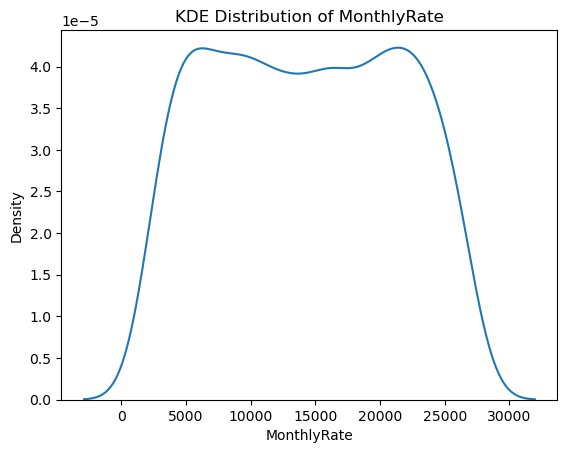

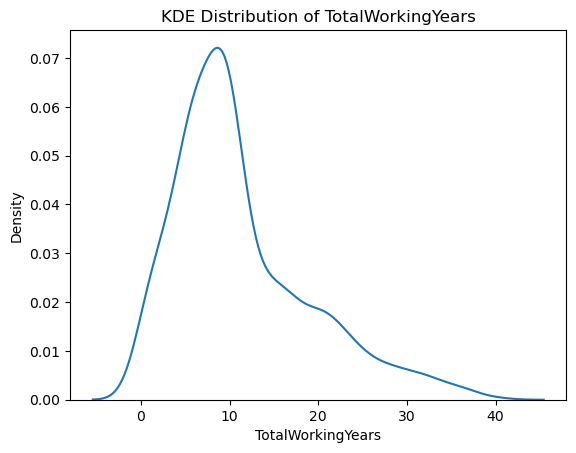

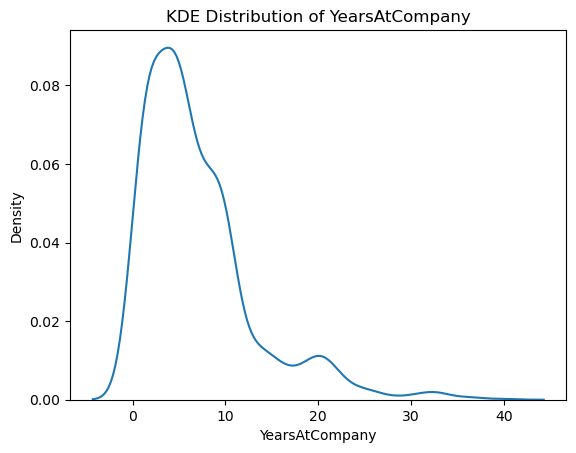

In [20]:
## KDE Plot

for plot,i in enumerate(con_col):
    plt.figure()
    sns.kdeplot(data = df, x = i)
    plt.title('KDE Distribution of {}'.format(i))

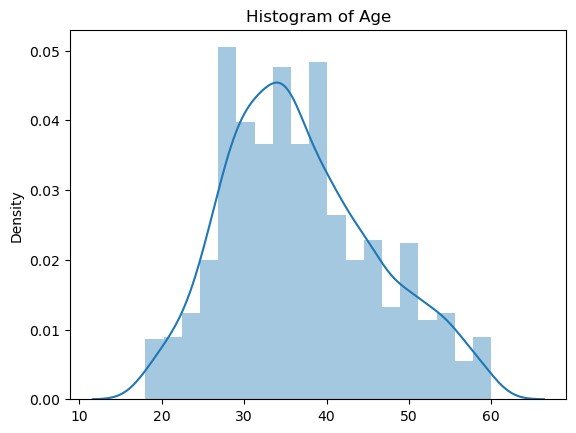

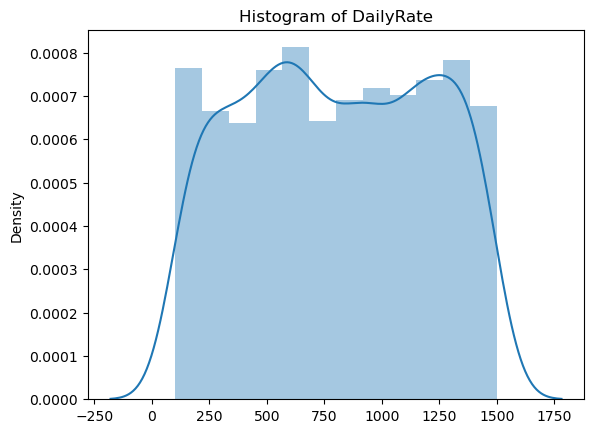

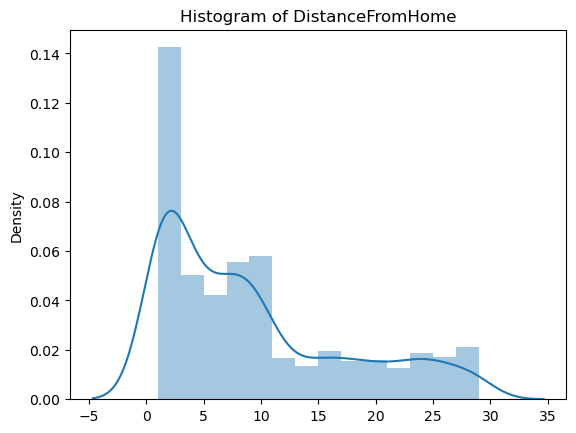

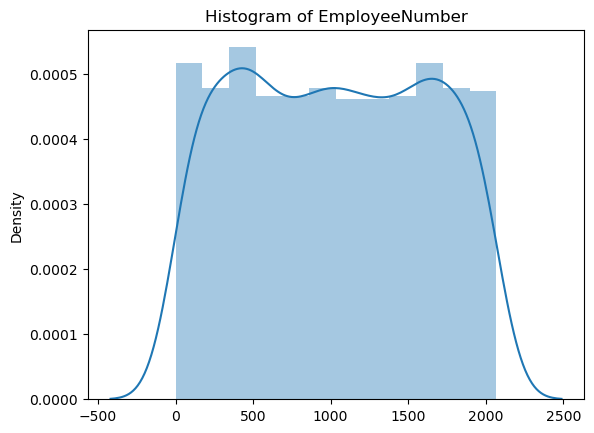

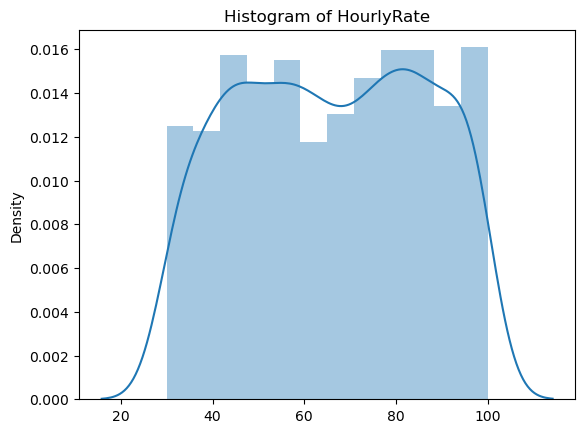

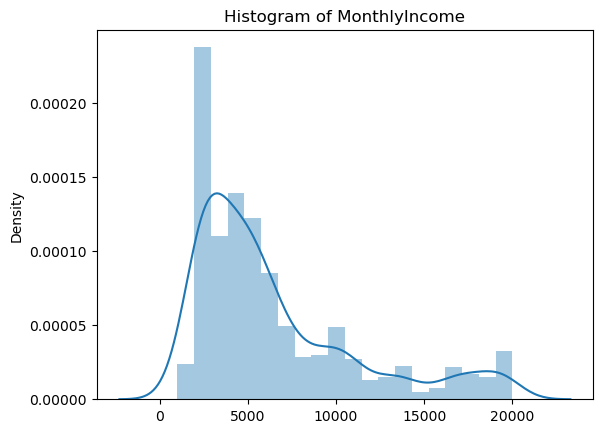

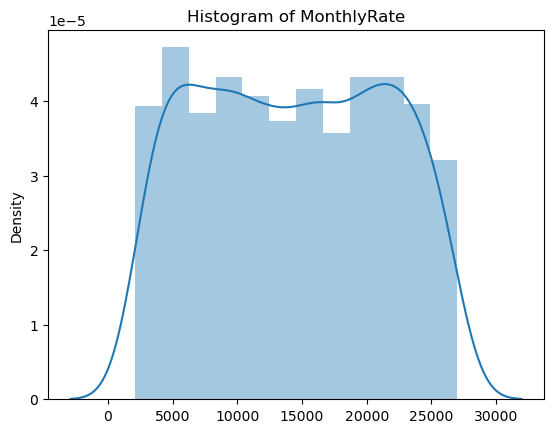

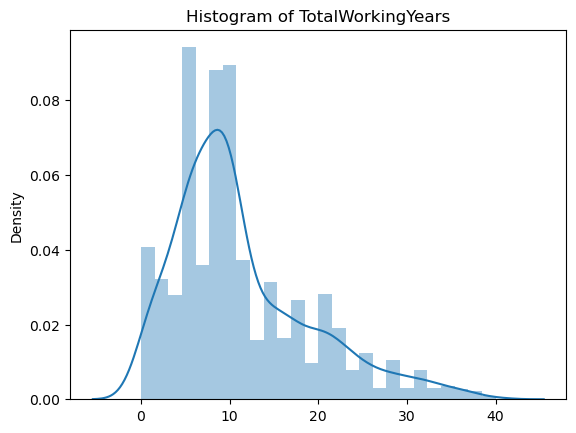

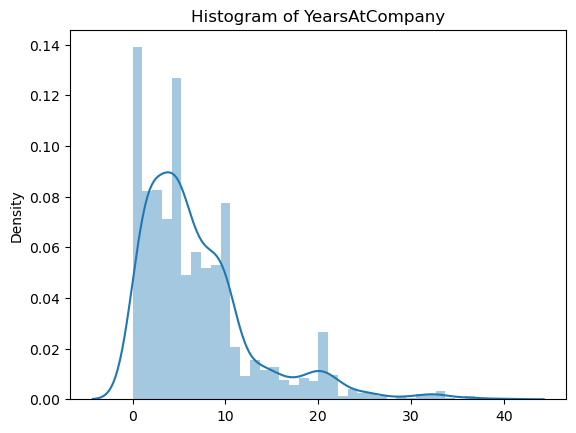

In [21]:
## Histogram Plot

for plot,i in enumerate(con_col):
    plt.figure()
    sns.distplot(x = df[i], kde = True)
    plt.title('Histogram of {}'.format(i))

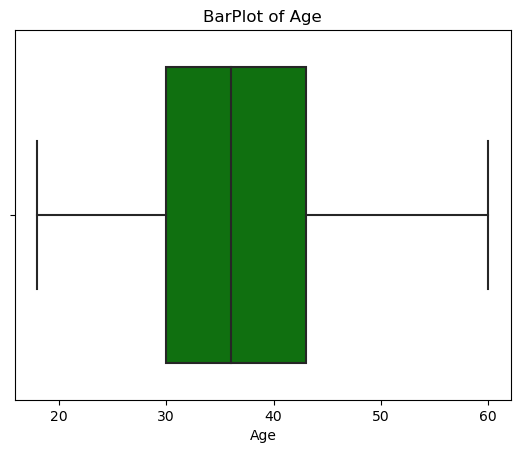

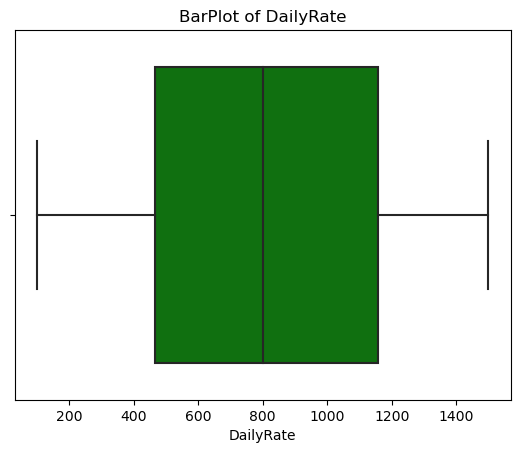

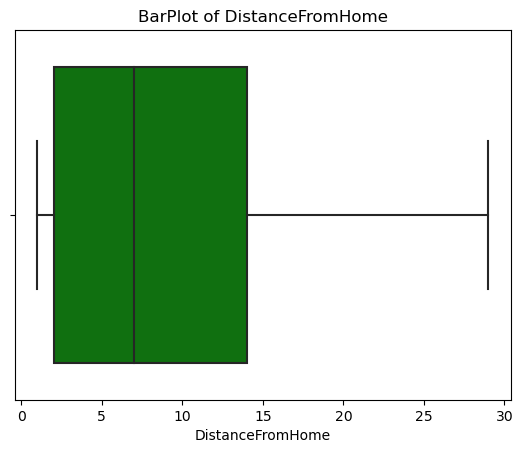

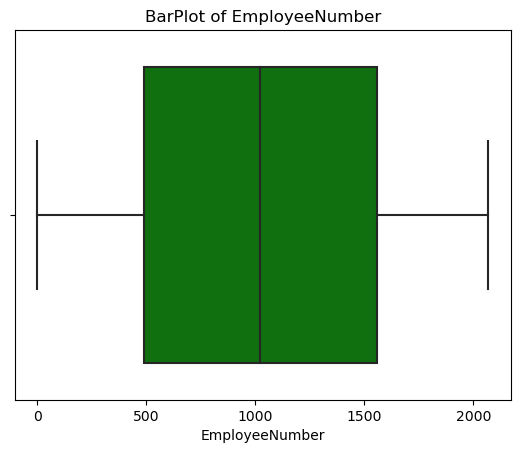

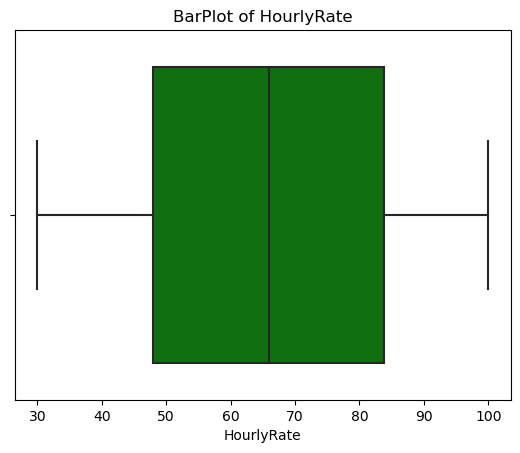

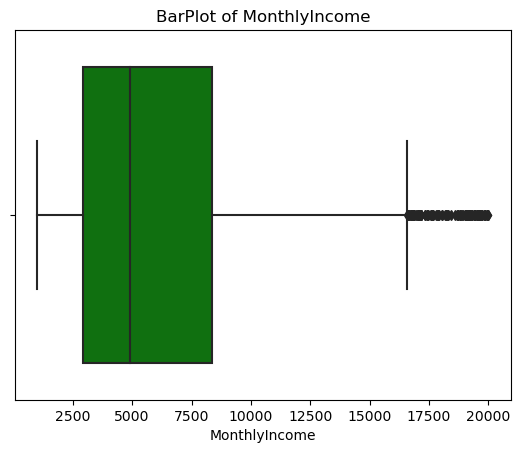

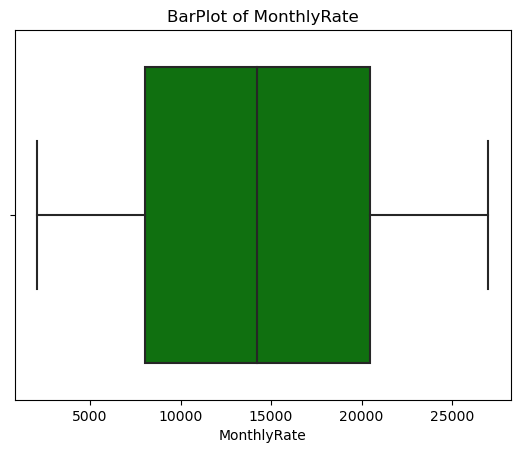

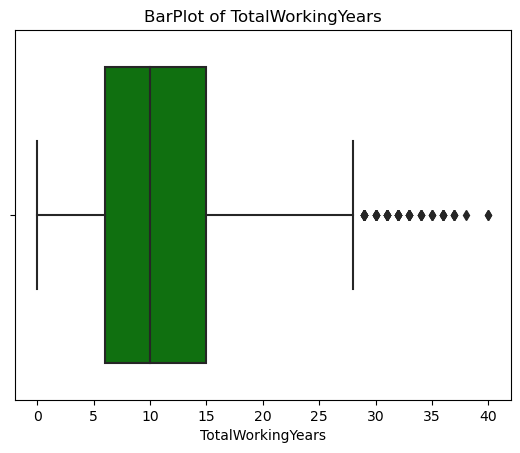

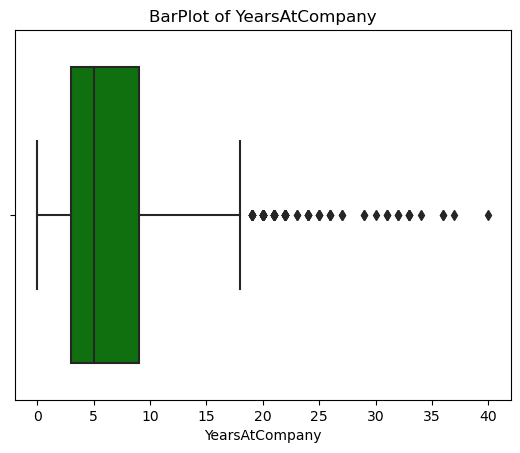

In [22]:
## BAR Plot

for plot,i in enumerate(con_col):
    plt.figure(plot)
    sns.boxplot(x = df[i], color = 'green')
    plt.title('BarPlot of {}'.format(i))

In [23]:
## Skewness Check

for i in con_col:
    print('Skewness of {} is {}'.format(i,df[i].skew()))

Skewness of Age is 0.4132863018563338
Skewness of DailyRate is -0.003518568352325854
Skewness of DistanceFromHome is 0.9581179956568269
Skewness of EmployeeNumber is 0.016574019580105036
Skewness of HourlyRate is -0.03231095290044942
Skewness of MonthlyIncome is 1.3698166808390662
Skewness of MonthlyRate is 0.018577807891132458
Skewness of TotalWorkingYears is 1.1171718528128527
Skewness of YearsAtCompany is 1.7645294543422085


* Right Skew present in the column MonthlyIncome, Total WorkExperience, yearAt Company

In [24]:
from sklearn.preprocessing import FunctionTransformer

In [15]:
skewed = []
for i in con_col:
    if abs(df[i].skew())>=1:
        skewed.append(i)
print(skewed)        

['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']


In [26]:
trans = {
    'LogTransform':FunctionTransformer(func = np.log1p),
    'Square': FunctionTransformer(func = np.square),
    'SquareRt': FunctionTransformer(func = np.square),
    'Reciprocal': FunctionTransformer(func = lambda x:x**3)
}

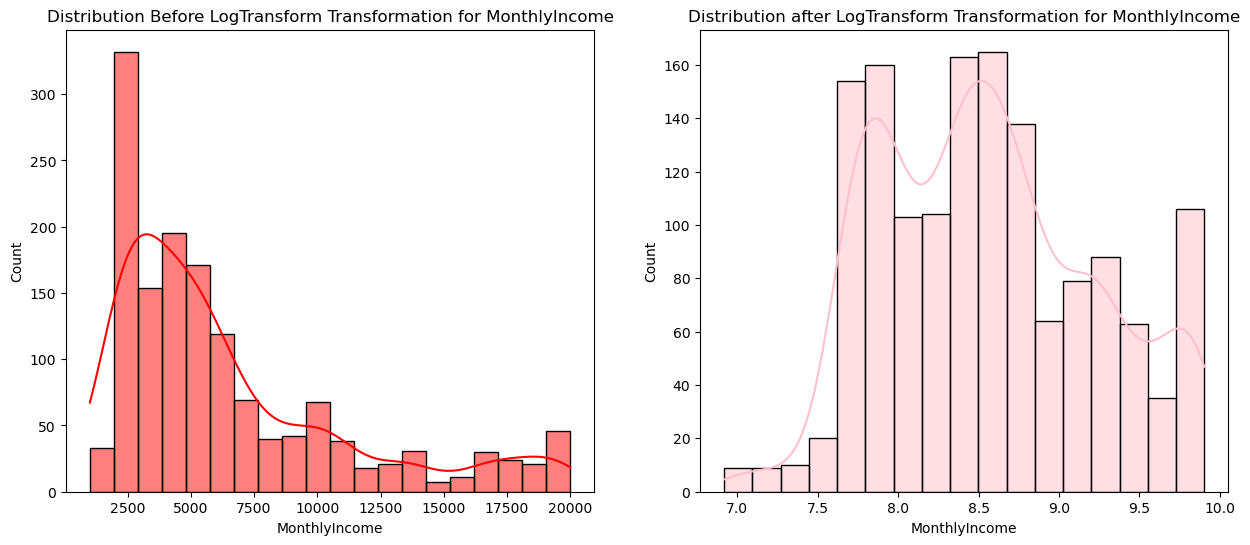

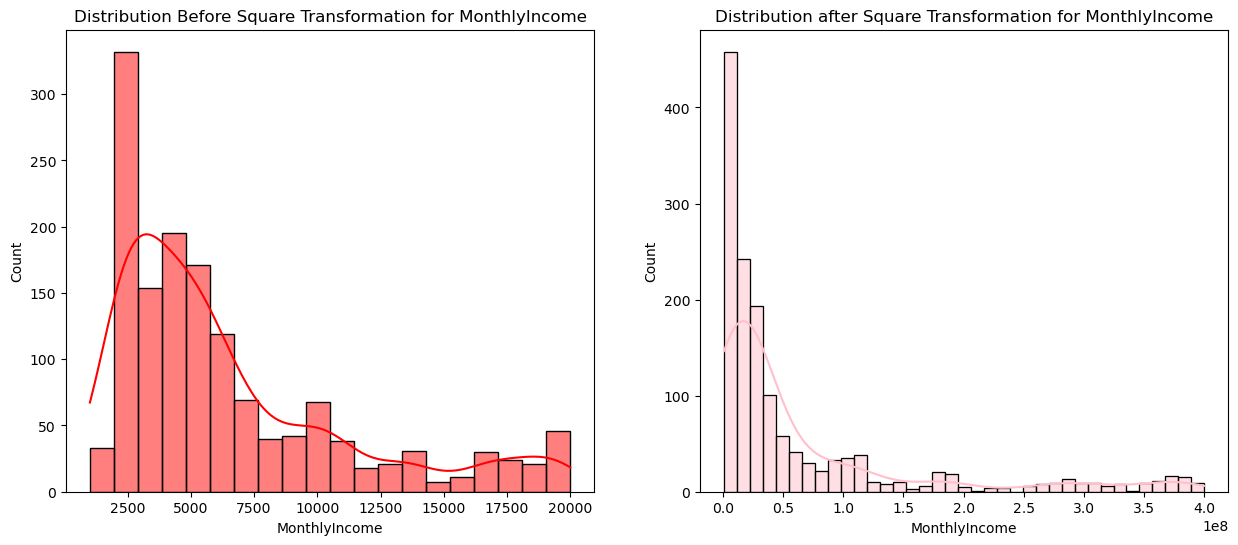

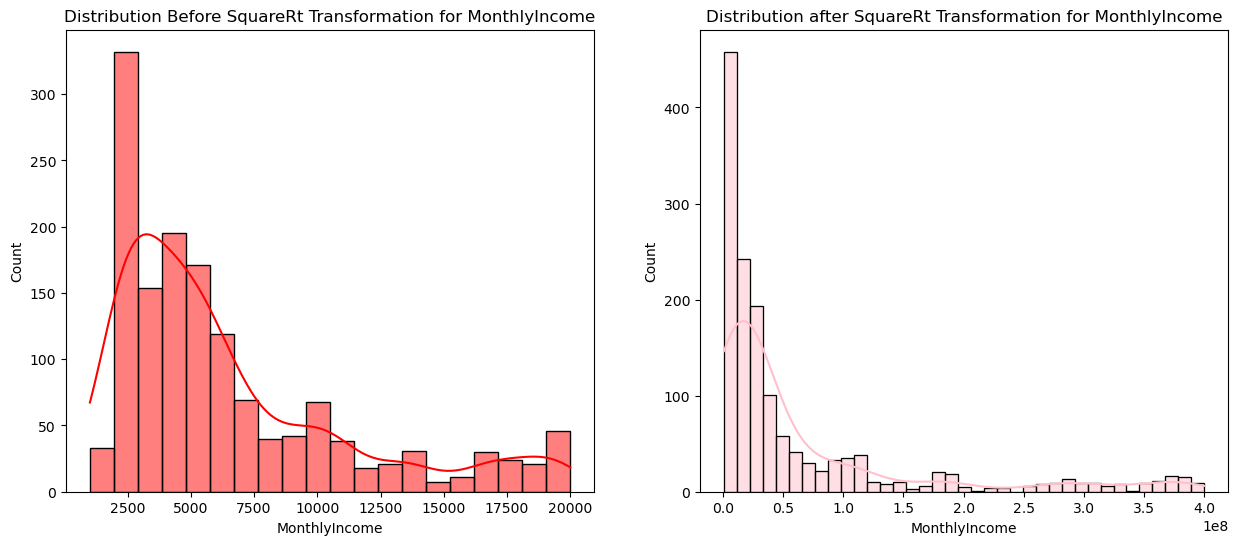

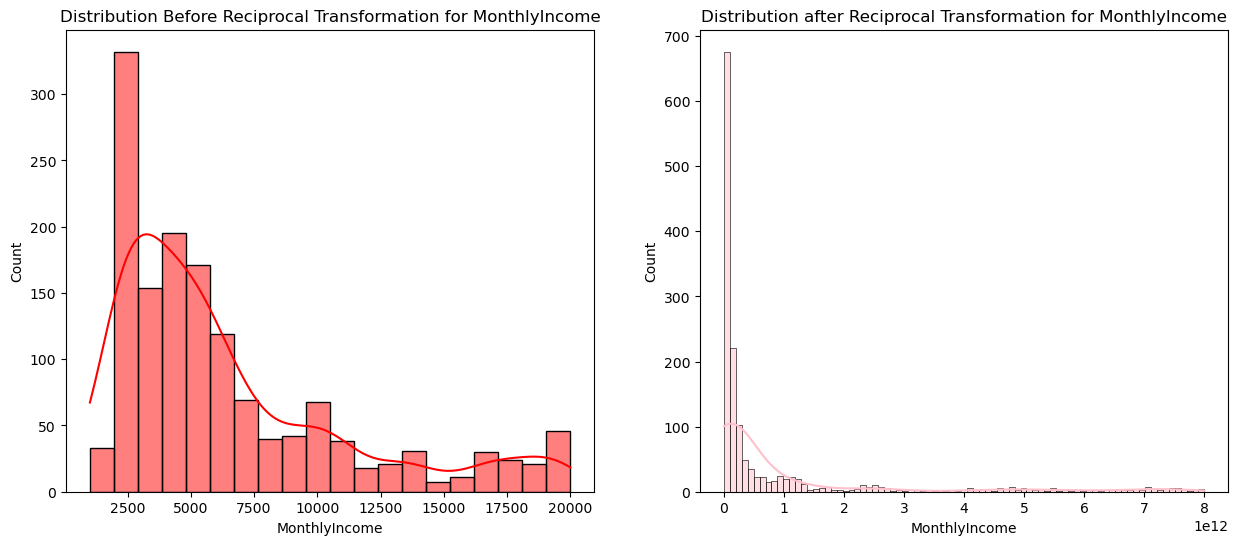

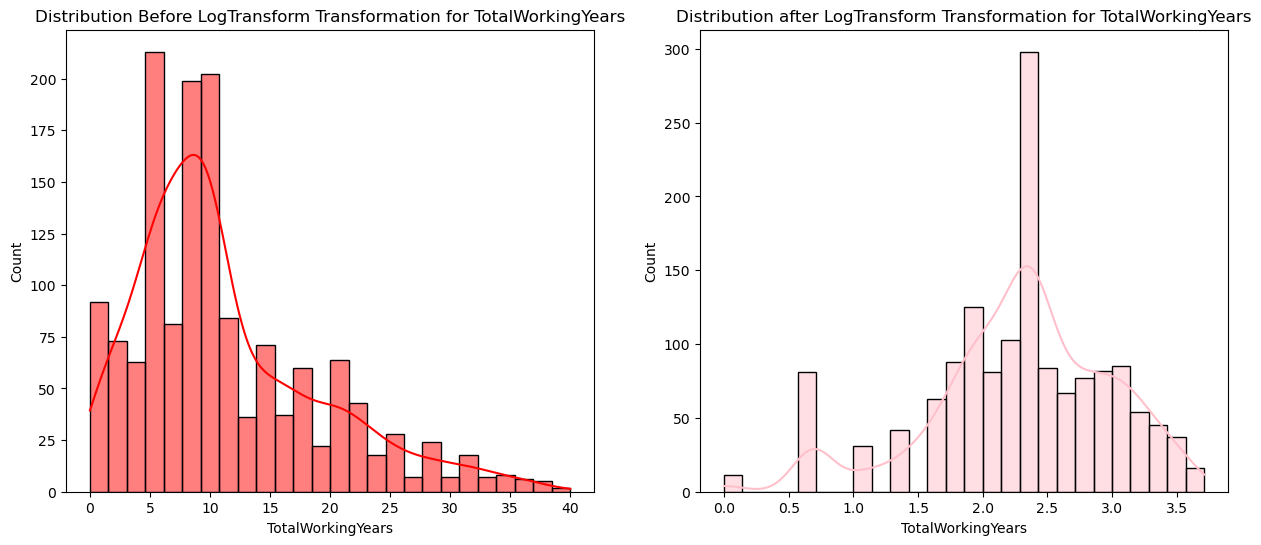

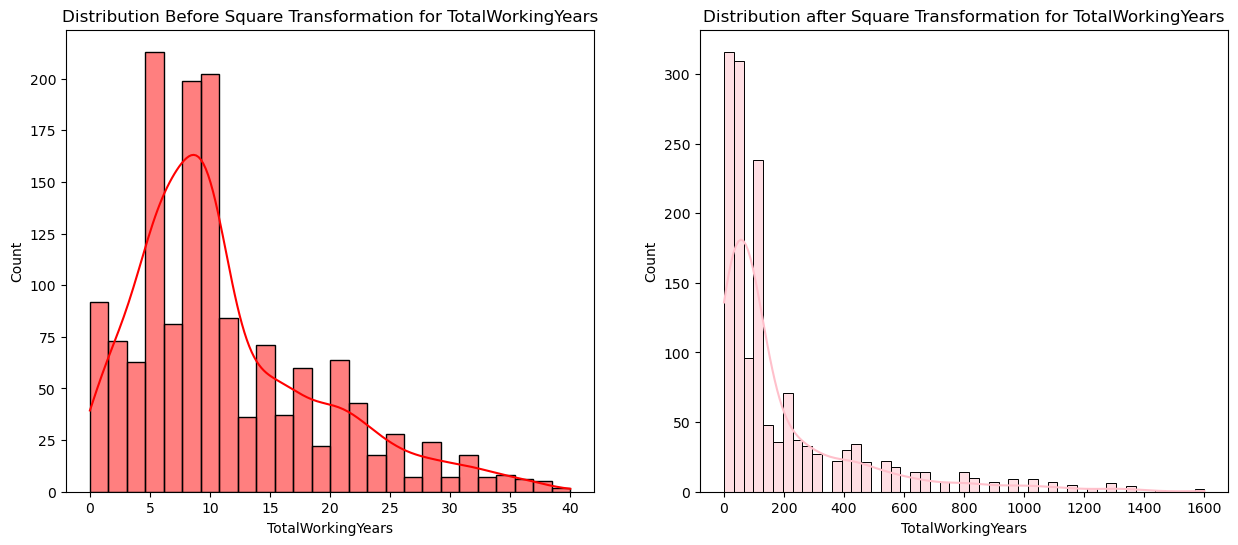

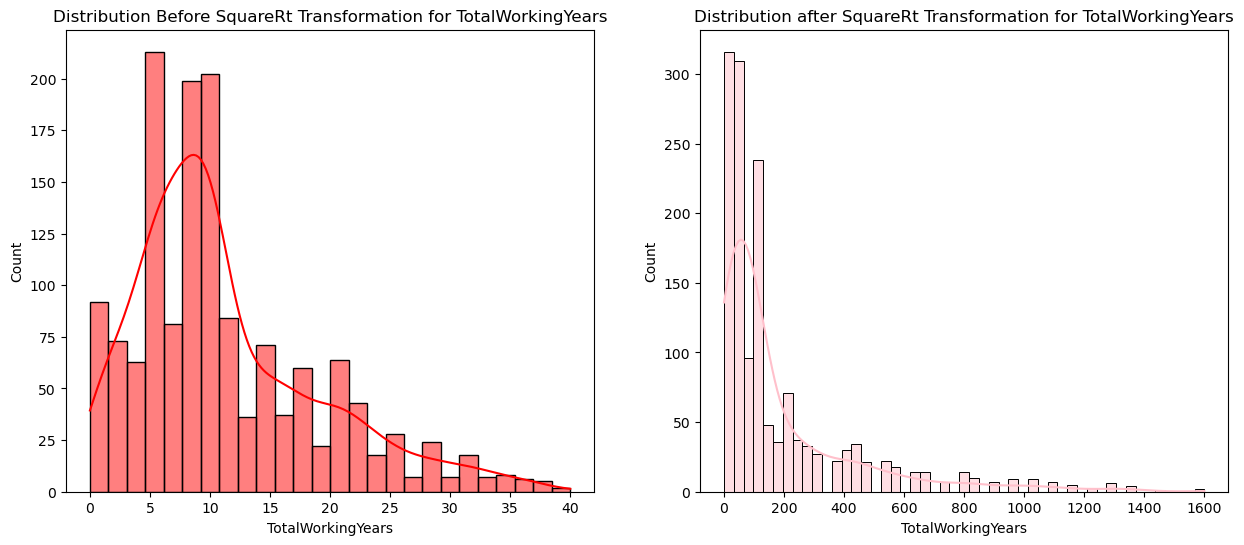

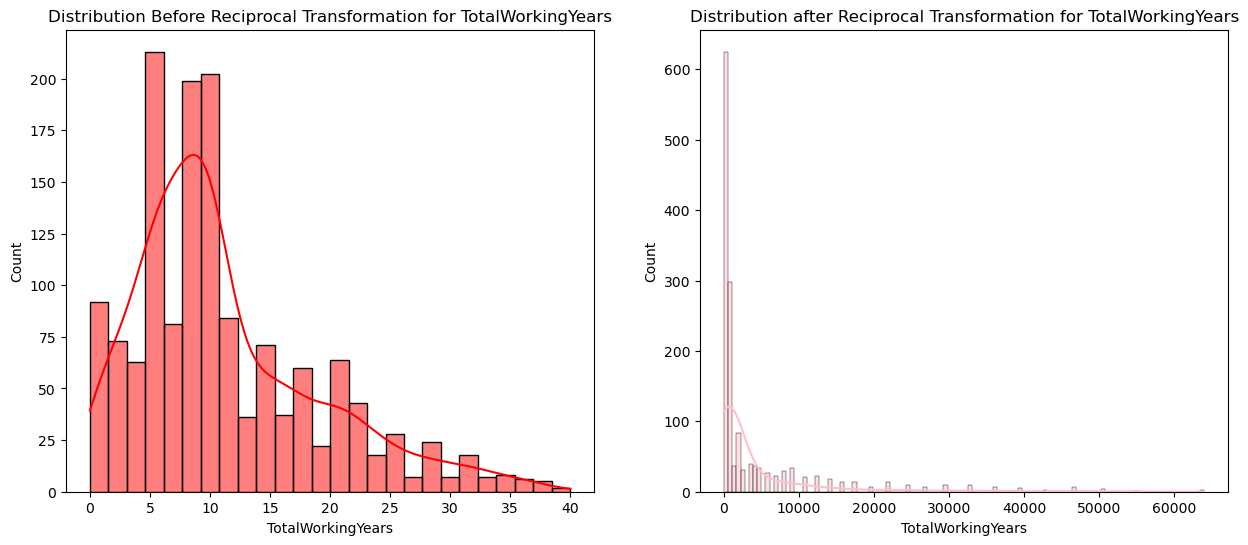

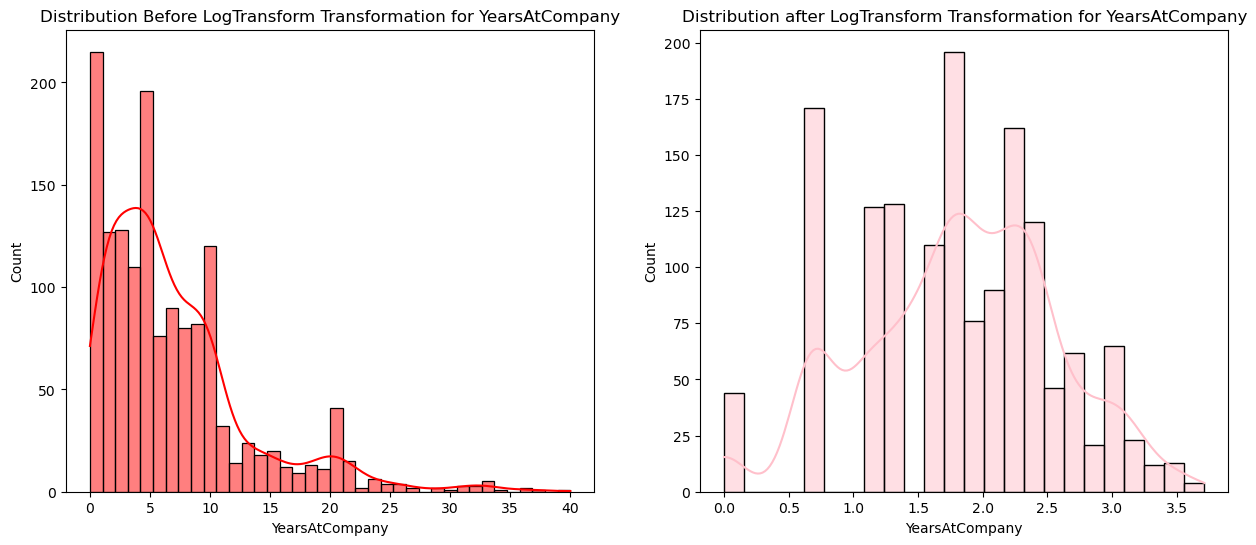

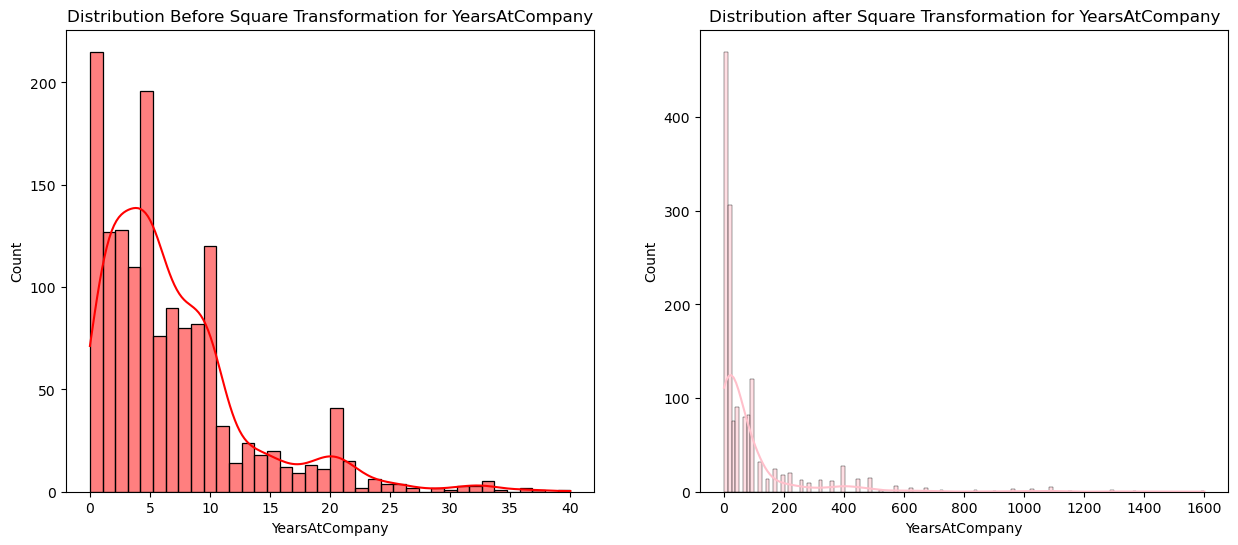

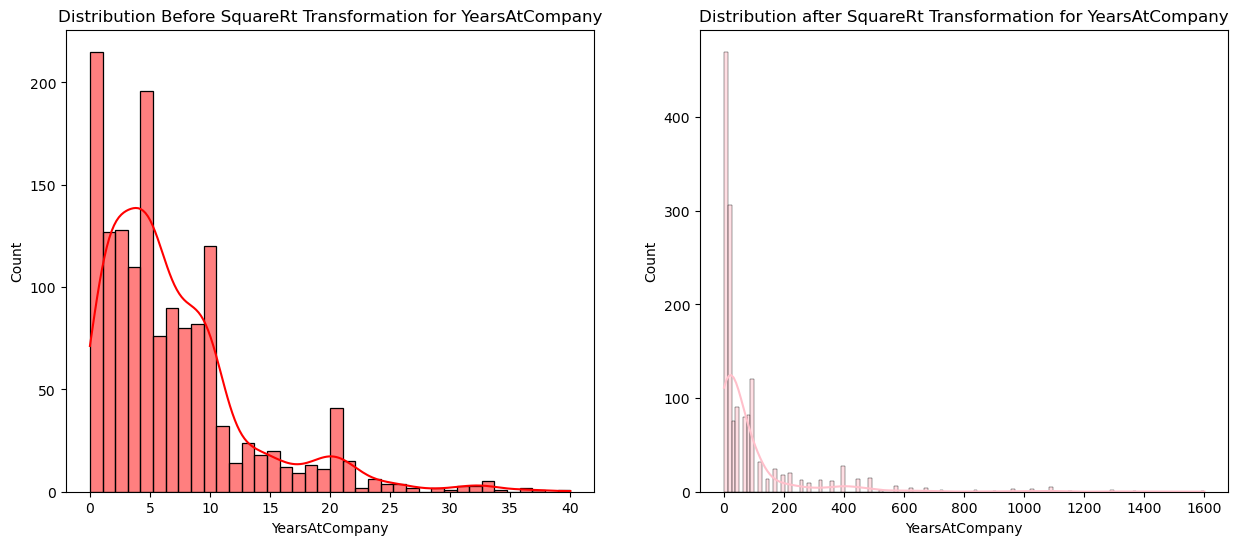

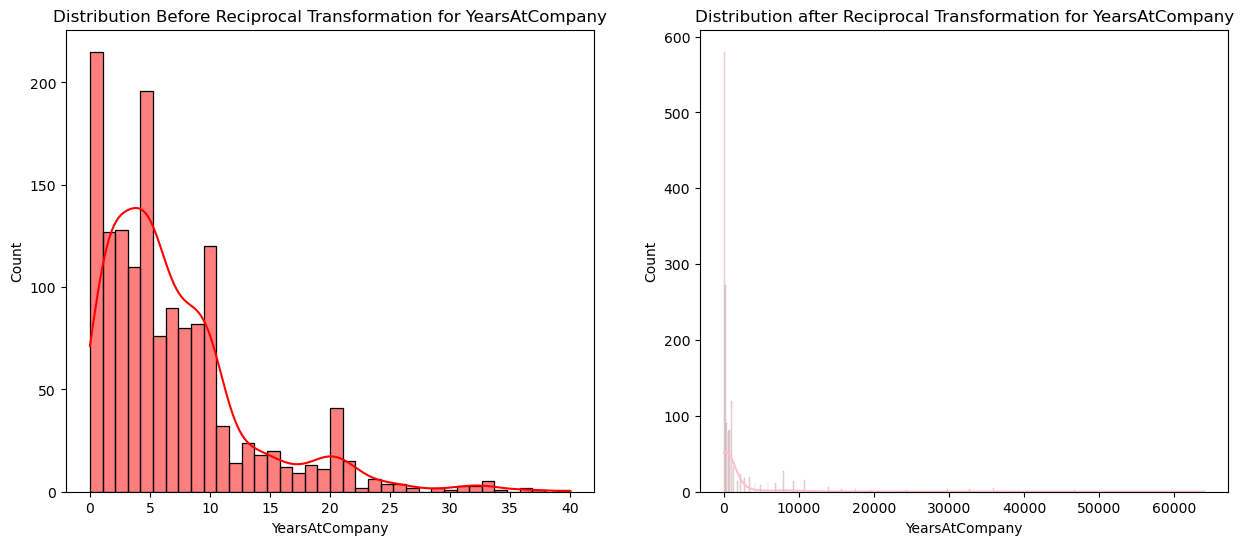

In [37]:
for i in skewed:
    df1 = df[i]
    
    for j in trans:
              
        df2 = trans[j].fit_transform(df1)
        
        plt.figure(figsize = (15,6))
        plt.subplot(1,2,1)
        plt.title('Distribution Before {} Transformation for {}'.format(j,i))
        sns.histplot(df1, kde = True, color = 'red')
        
        
            
        plt.subplot(1,2,2)
        plt.title('Distribution after {} Transformation for {}'.format(j,i))
        sns.histplot(df2, kde = True,color = 'pink')

In [40]:
for i in skewed:
    df1 = df[i]
    
    for j in trans:    
        df2 = trans[j].fit_transform(df1)
        
        print('The Skewness Before {}  Transformation is {} and After Transformation is {} for {}'.format(j, df1.skew(), df2.skew(),i))

The Skewness Before LogTransform  Transformation is 1.3698166808390662 and After Transformation is 0.2864483763069351 for MonthlyIncome
The Skewness Before Square  Transformation is 1.3698166808390662 and After Transformation is 2.1464178771459768 for MonthlyIncome
The Skewness Before SquareRt  Transformation is 1.3698166808390662 and After Transformation is 2.1464178771459768 for MonthlyIncome
The Skewness Before Reciprocal  Transformation is 1.3698166808390662 and After Transformation is 2.6587292130441273 for MonthlyIncome
The Skewness Before LogTransform  Transformation is 1.1171718528128527 and After Transformation is -0.6221748653178674 for TotalWorkingYears
The Skewness Before Square  Transformation is 1.1171718528128527 and After Transformation is 2.3637167675891346 for TotalWorkingYears
The Skewness Before SquareRt  Transformation is 1.1171718528128527 and After Transformation is 2.3637167675891346 for TotalWorkingYears
The Skewness Before Reciprocal  Transformation is 1.11717

In [ ]:
## Selected Transformation is LogTransformation to remove Skewness for skewed columns

We have to remove those columns which has only single value. As these columns are useless for Machine Learning model

## Dropping Useless Columns

In [16]:
drop_col = []
cat_col_new = []

for i in cat_col:
    if df[i].nunique()==1:
        drop_col.append(i)
    else:
        cat_col_new.append(i)
        

In [17]:
print(cat_col_new)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [56]:
df.drop(columns = drop_col,inplace = True)

In [81]:
df.shape

(1470, 32)

In [ ]:
## Univerite Analysis for Categorical 

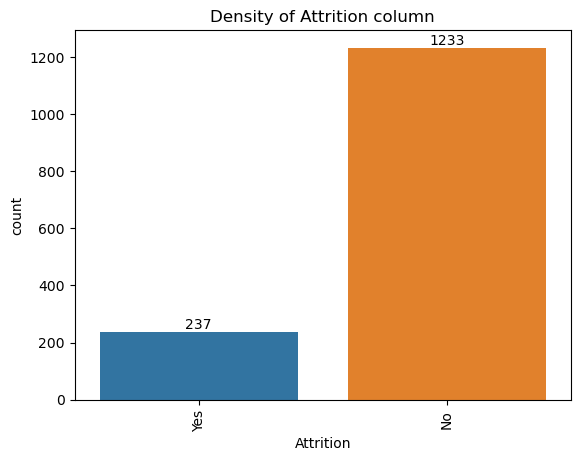

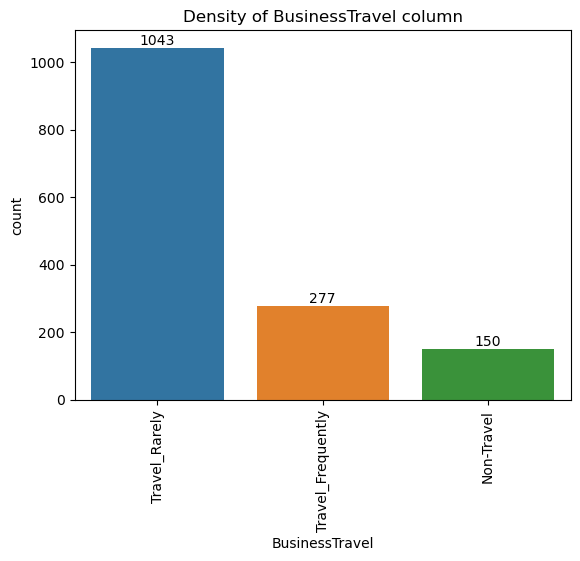

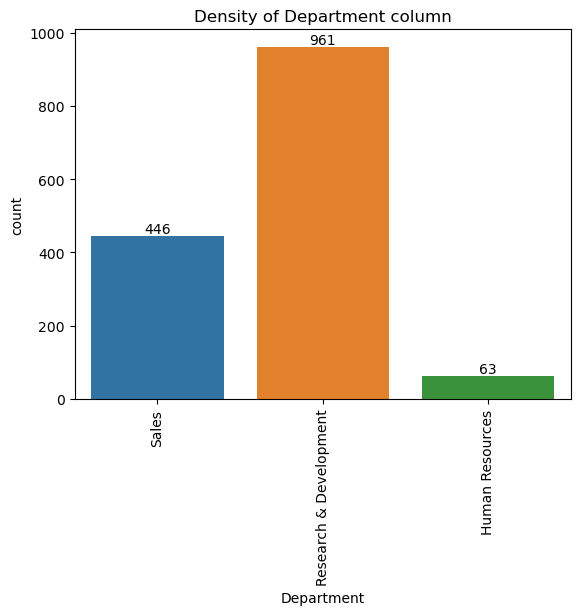

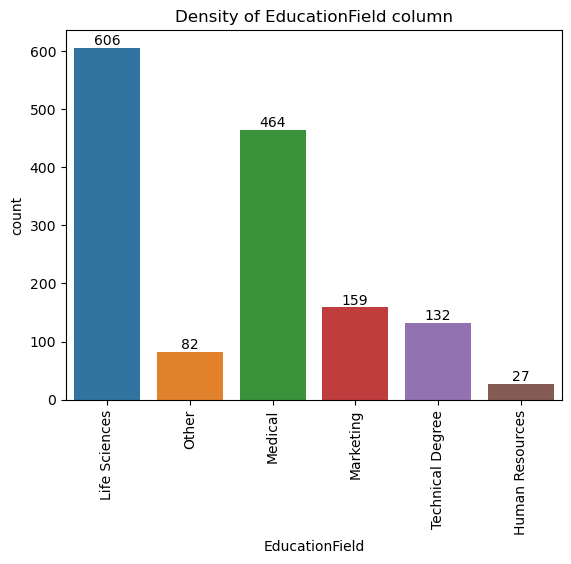

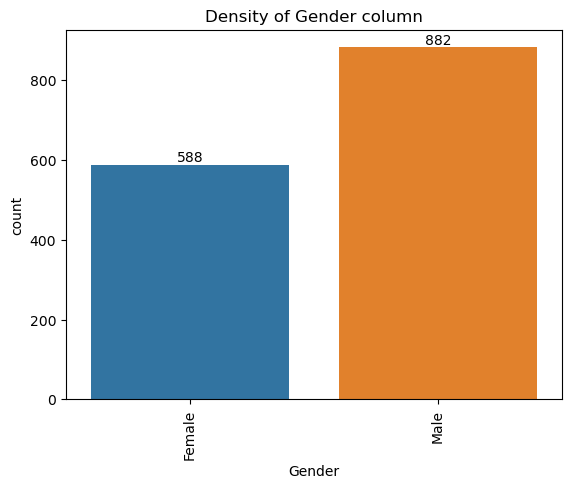

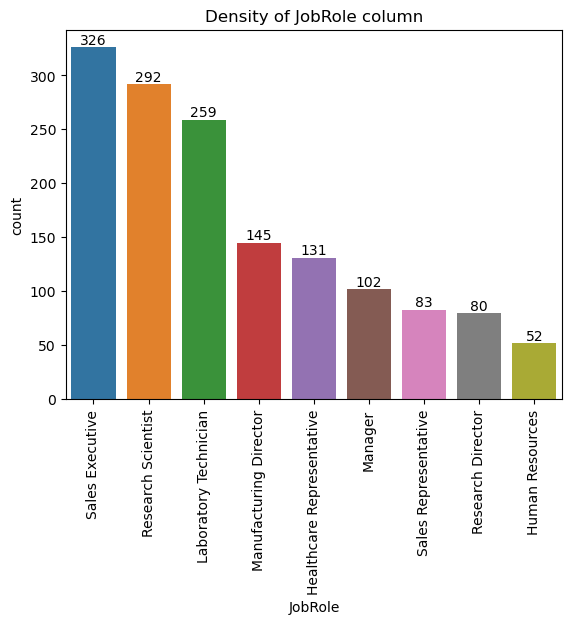

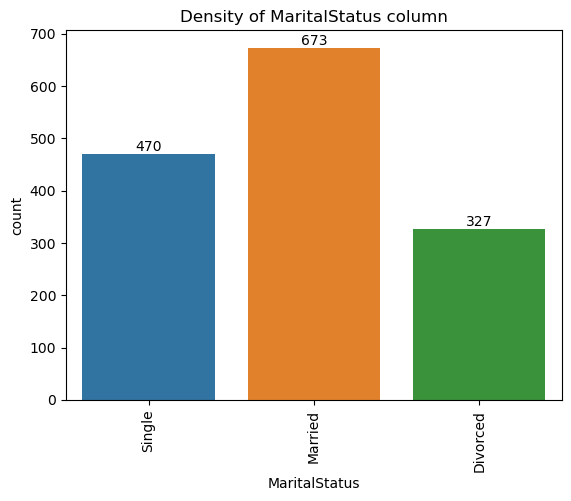

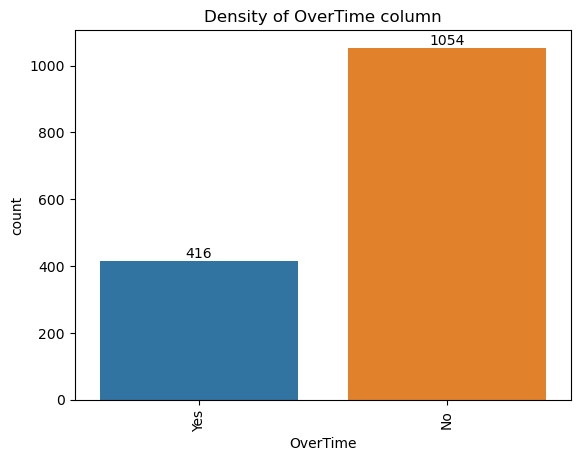

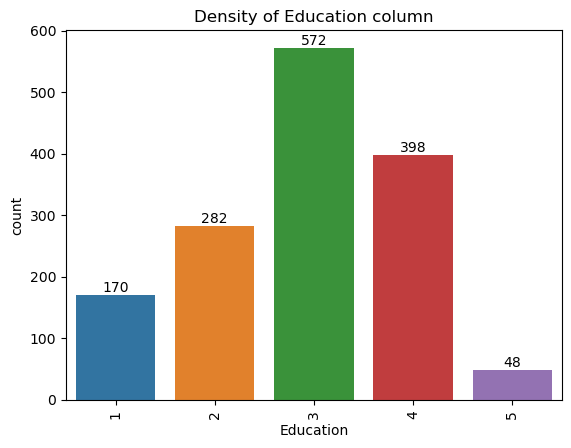

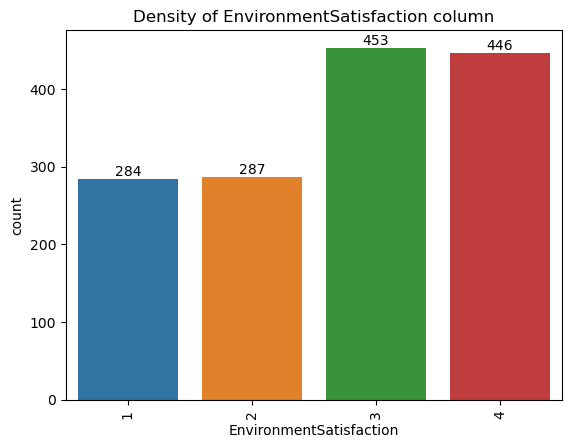

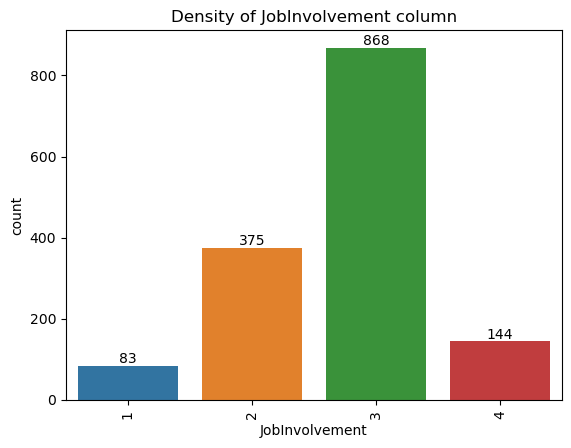

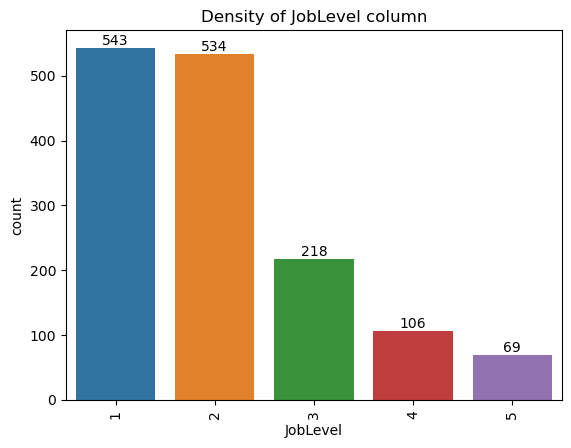

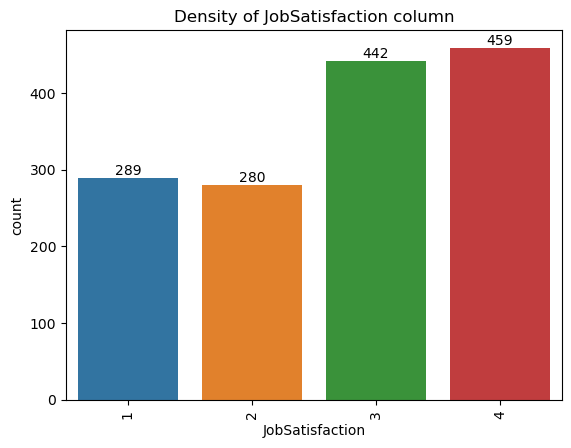

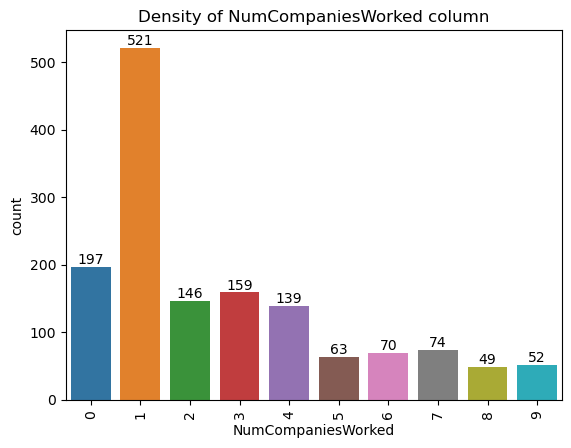

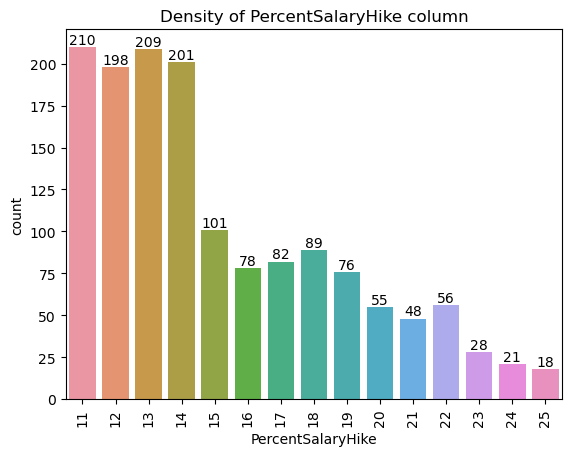

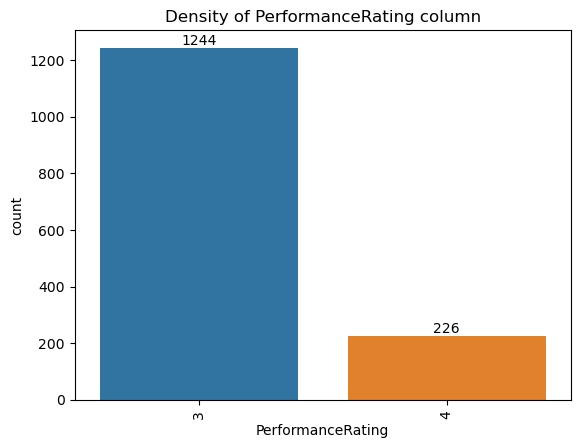

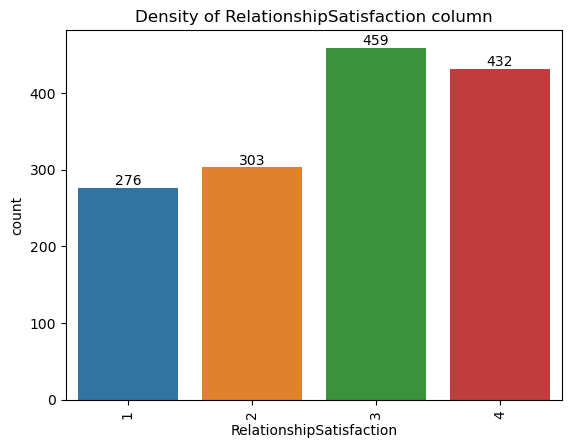

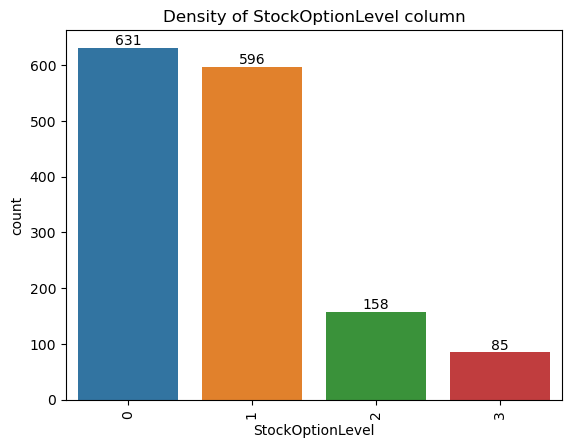

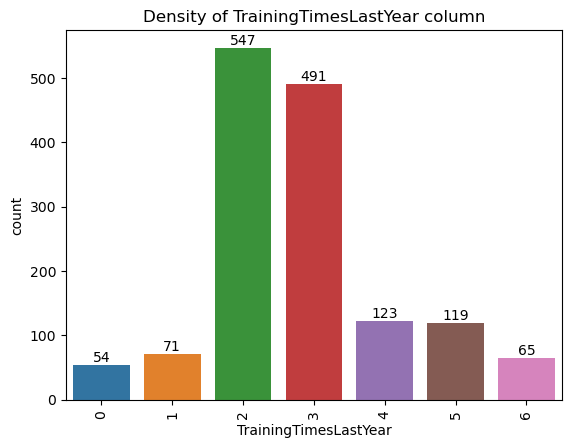

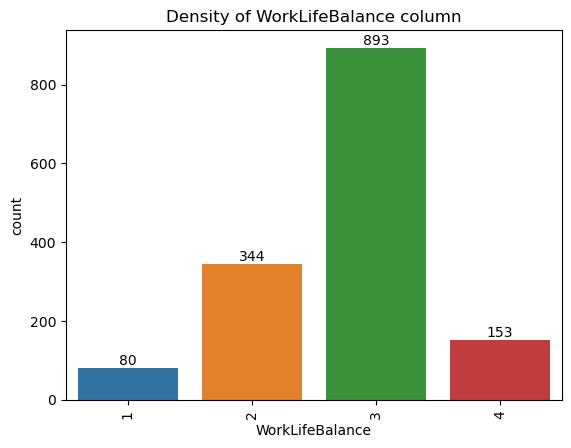

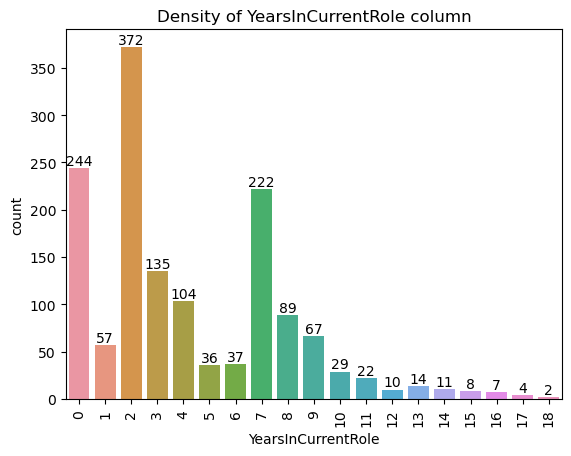

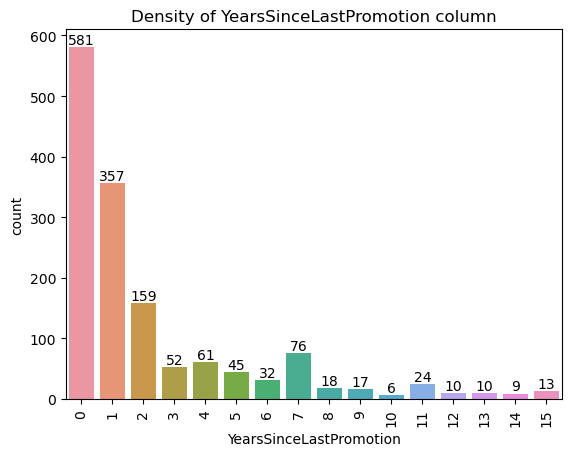

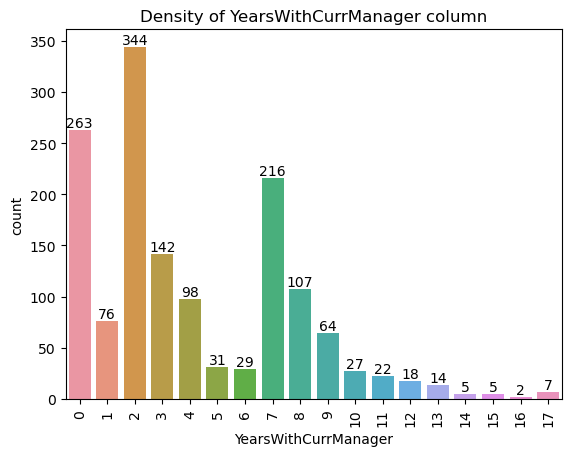

In [87]:
for i in cat_col_new:
    plt.figure(i)
    ax = sns.countplot(data = df, x = i)
    
    for j in ax.containers:
        ax.bar_label(j)
        
        plt.xticks(rotation = 'vertical')
        
        
        plt.title('Density of {} column'.format(i))

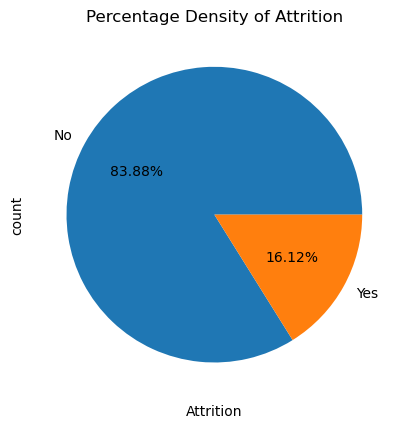

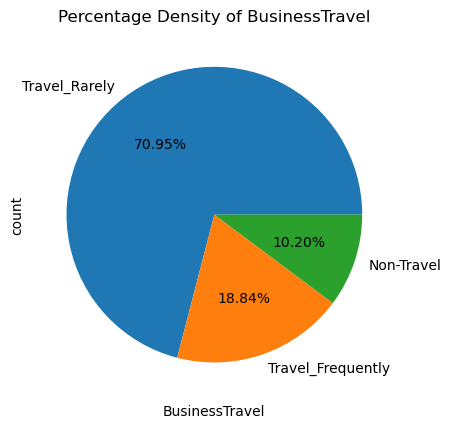

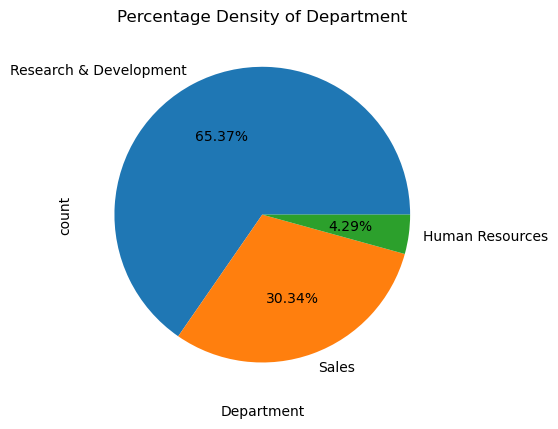

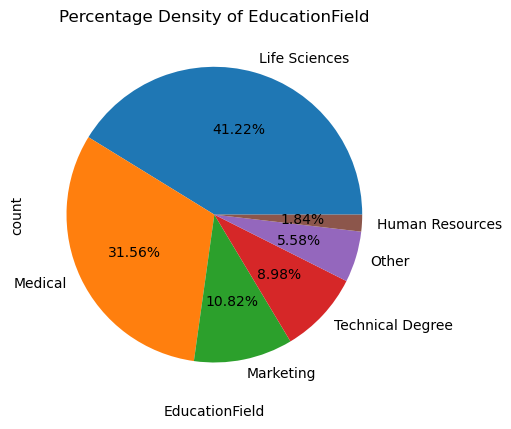

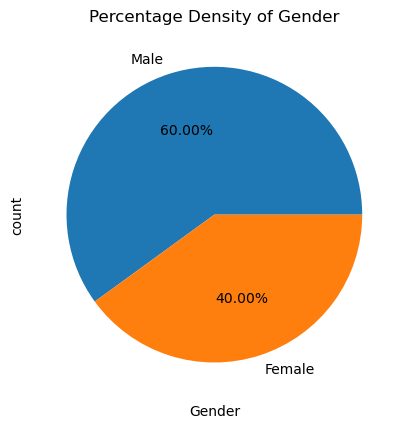

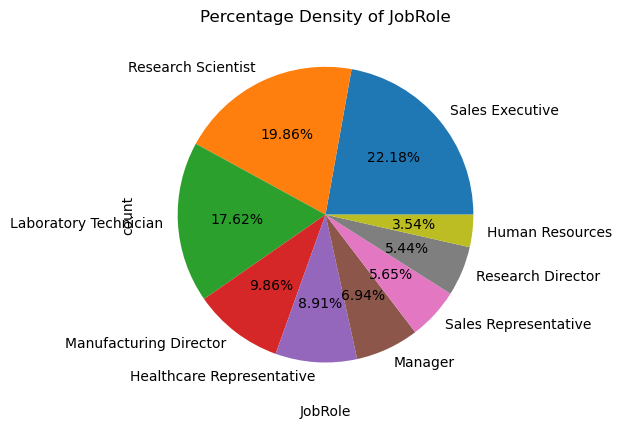

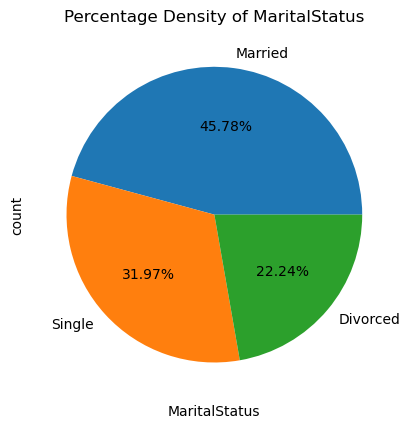

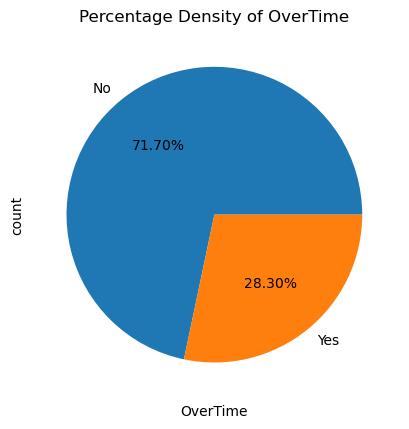

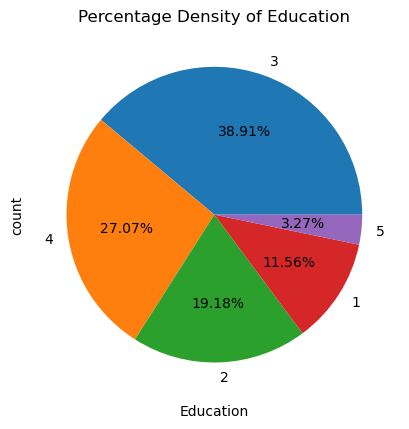

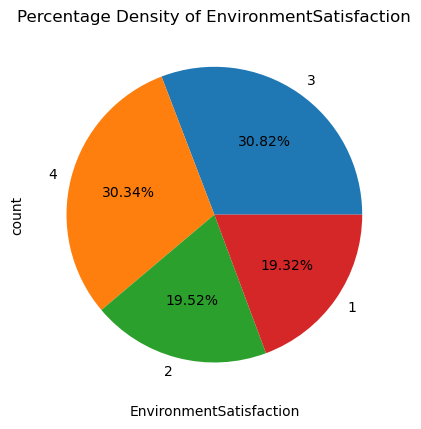

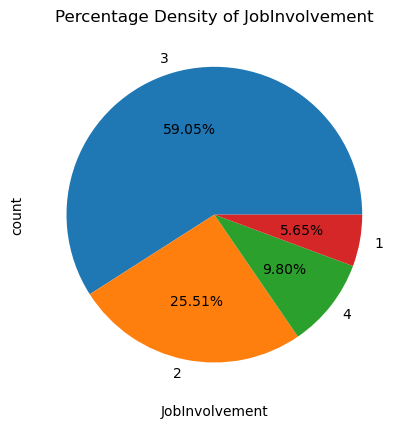

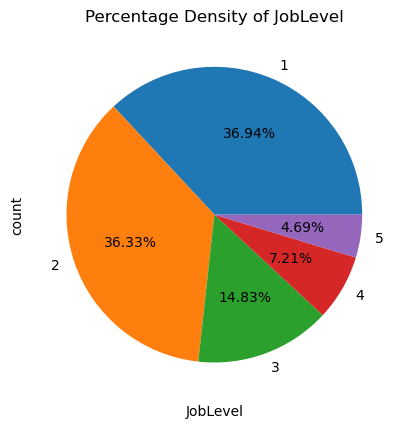

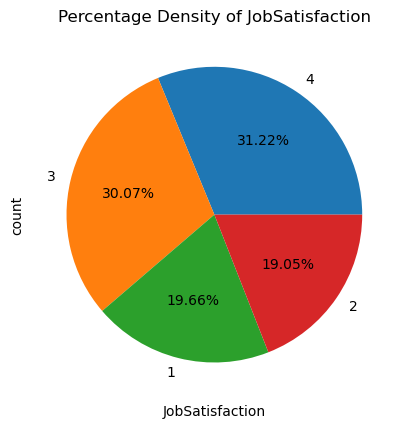

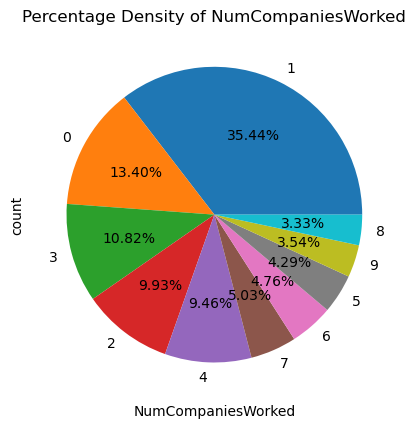

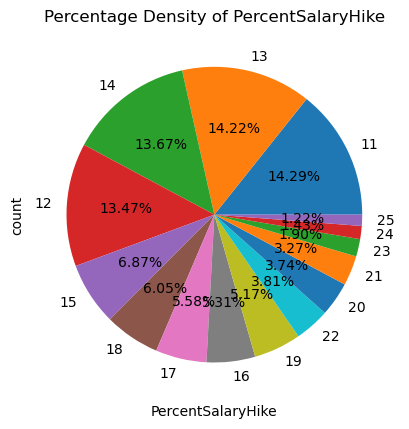

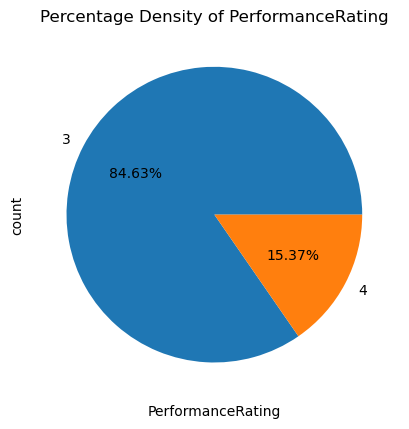

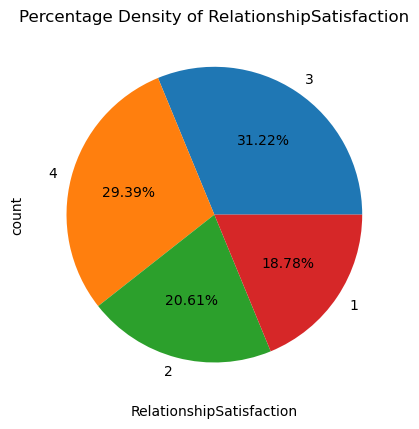

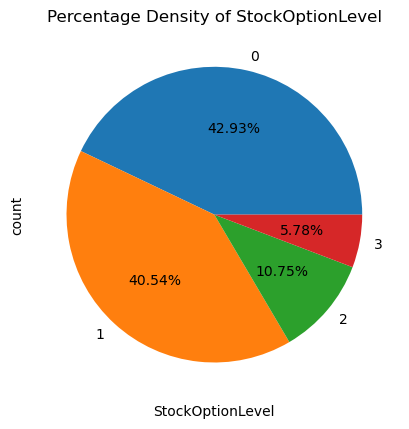

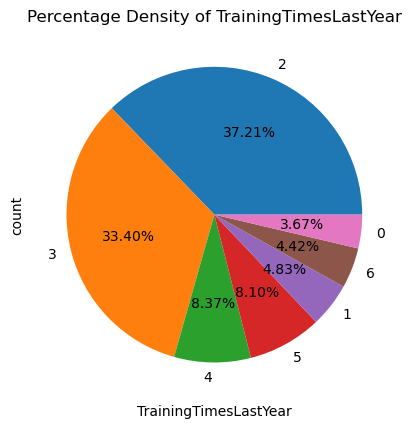

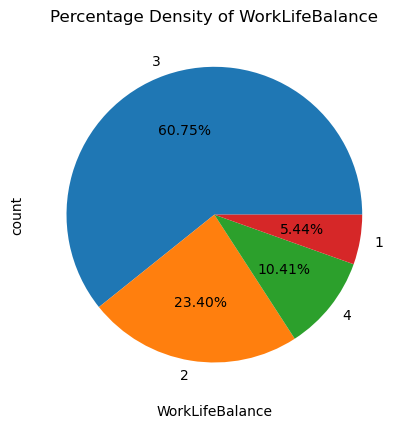

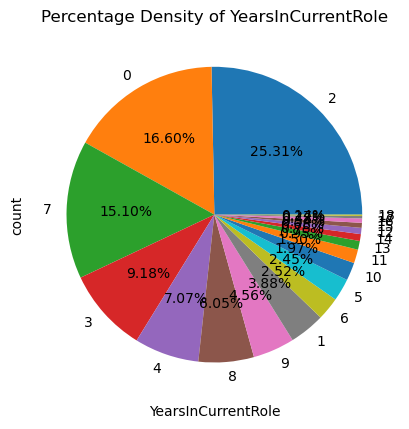

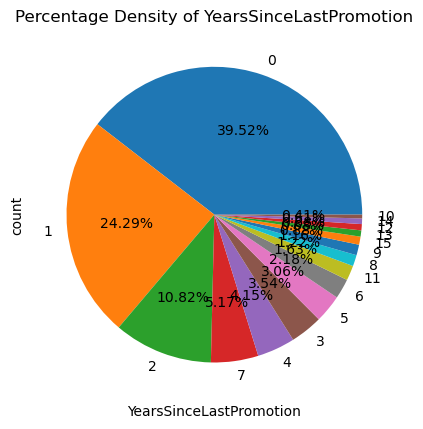

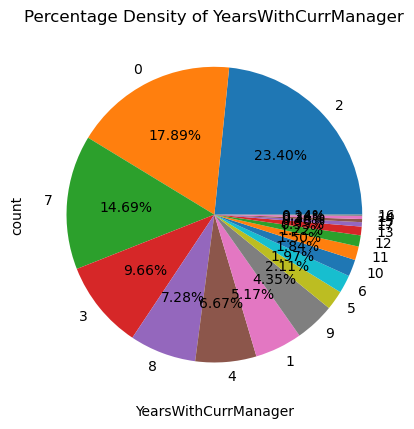

In [90]:
for i in cat_col_new:
    plt.figure(i)
    df[i].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
    plt.xlabel(i)
    plt.title('Percentage Density of {}'.format(i))

In [19]:
con_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

In [22]:
cat_col_new.remove('Attrition') ## Removing target Veriable

In [23]:
cat_col_new

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [24]:
target = 'Attrition'

## Biveriate Analysis Between Countinuous & Categorical Columns

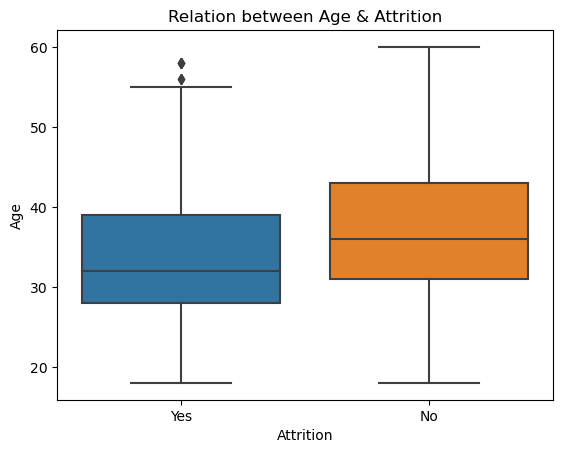

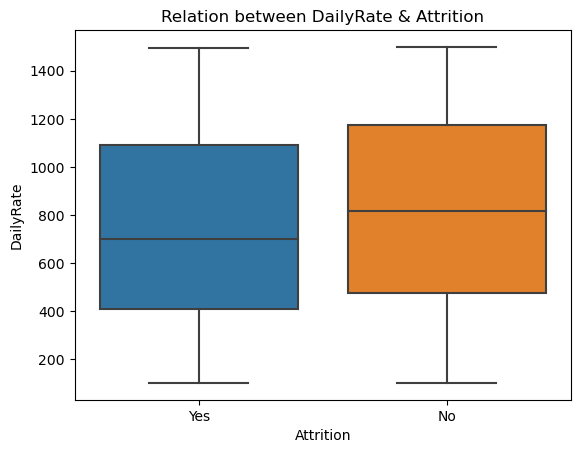

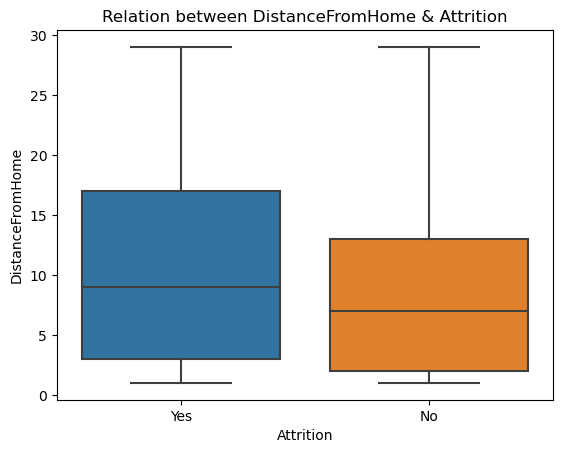

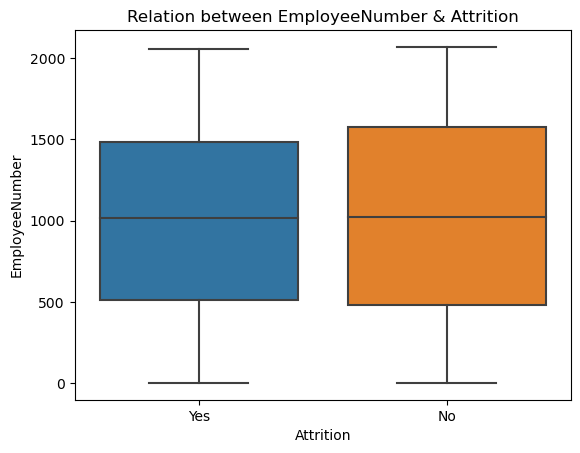

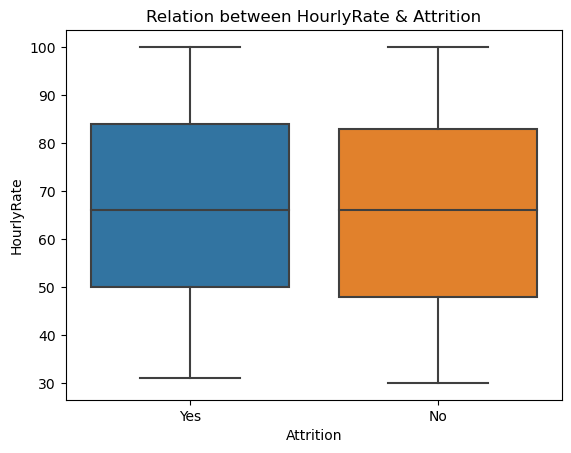

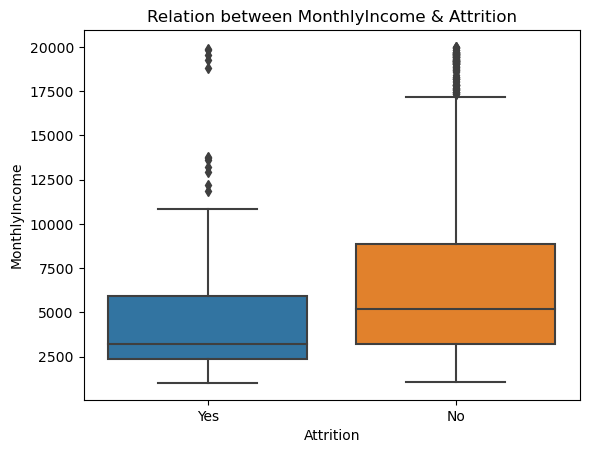

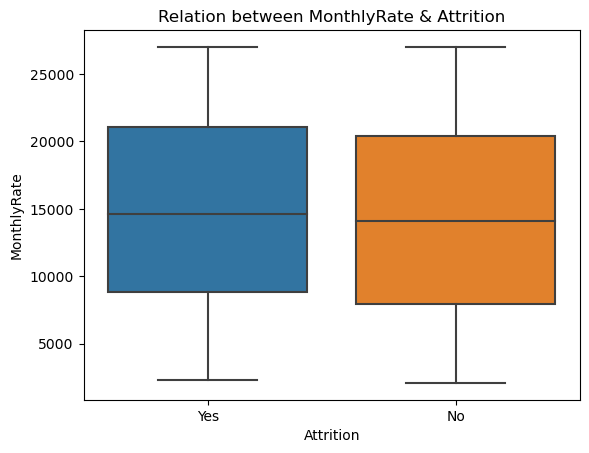

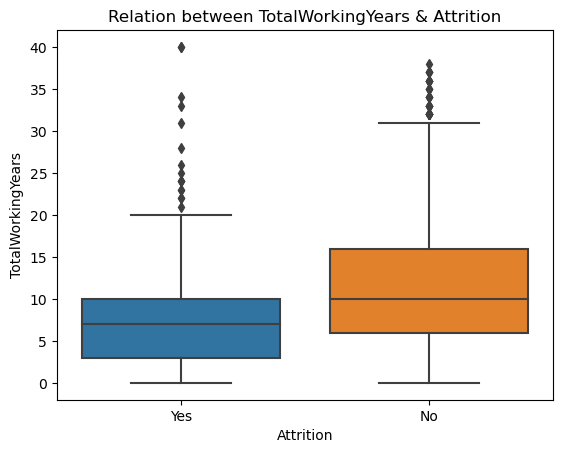

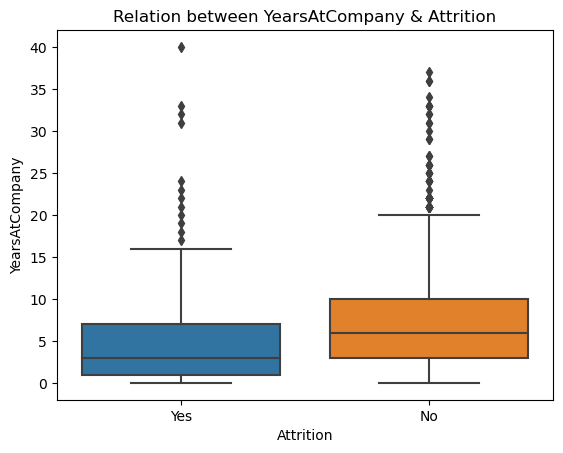

In [103]:
for i in con_col:
    plt.figure(i)
    sns.boxplot(data = df, x = target, y = i)
    plt.title('Relation between {} & Attrition'.format(i))

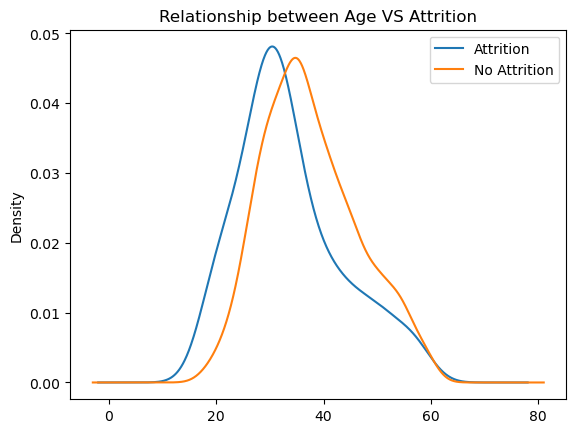

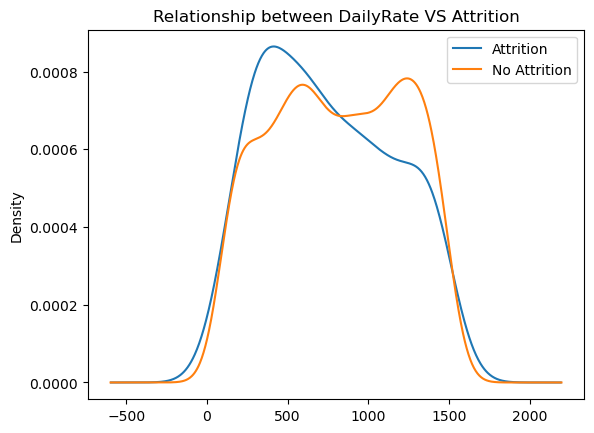

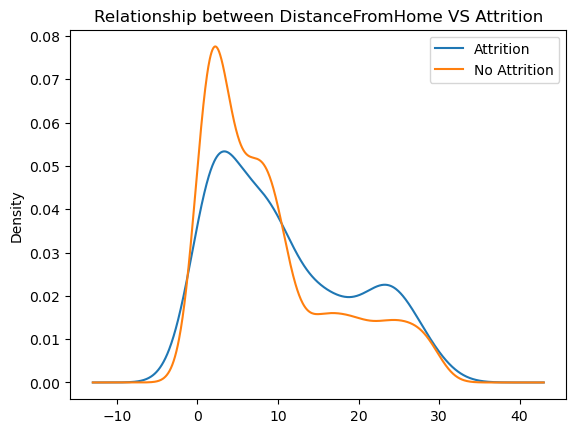

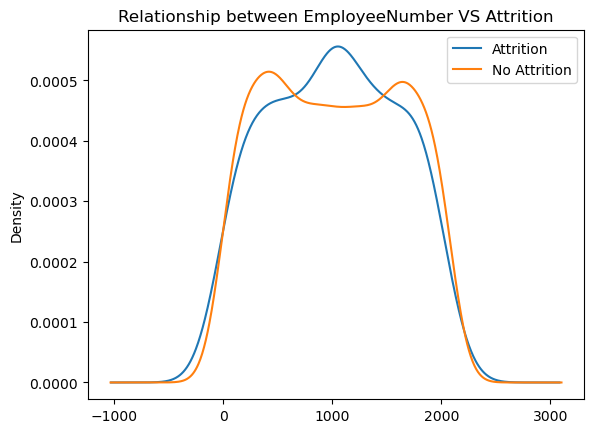

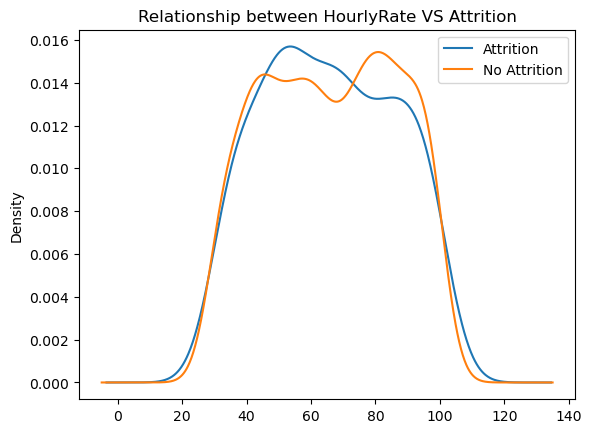

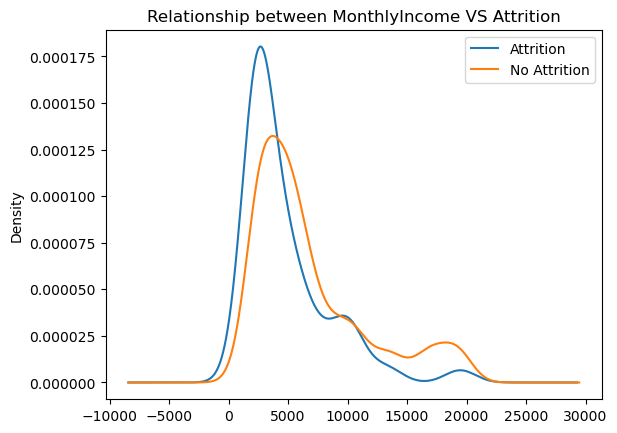

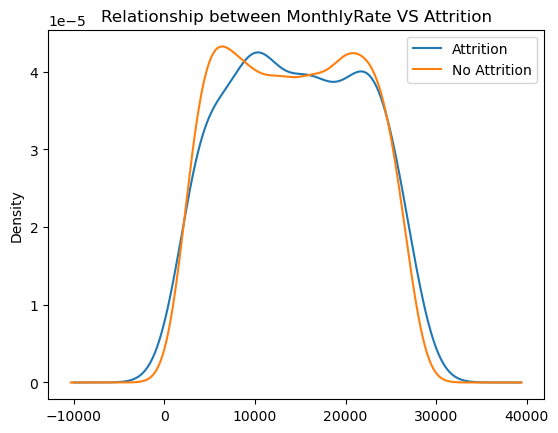

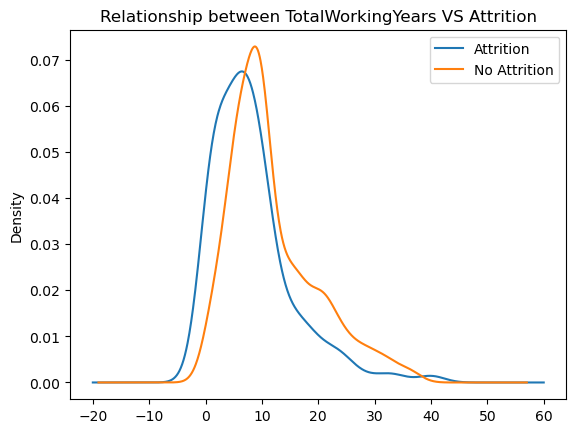

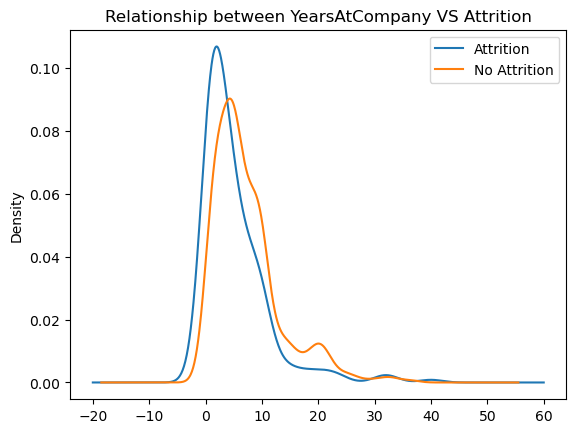

In [116]:

for i in con_col:
    df[df[target] == 'Yes'][i].plot(kind = 'kde',label = 'Attrition')
    df[df[target] == 'No'][i].plot(kind = 'kde', label = 'No Attrition')
    plt.legend()
    plt.title('Relationship between {} VS Attrition'.format(i))
    plt.show()

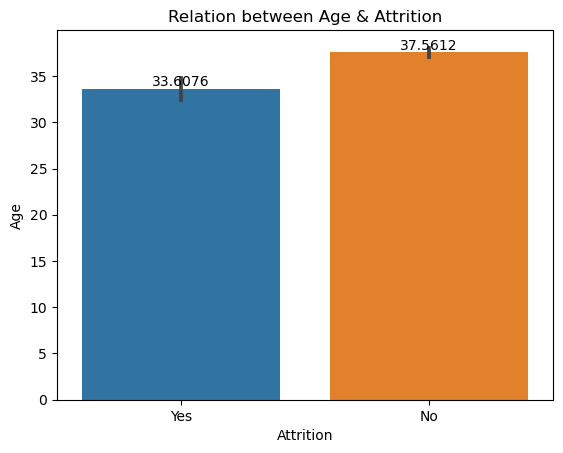

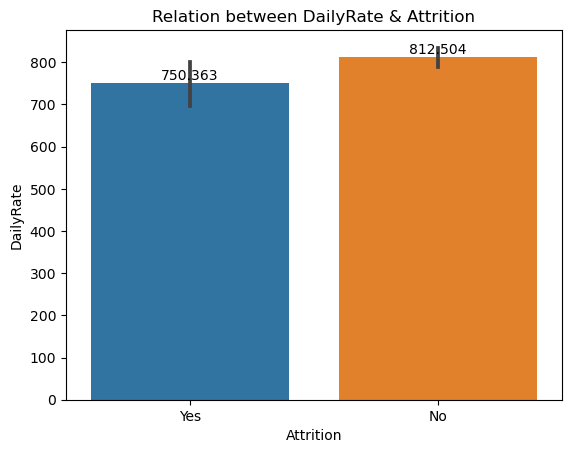

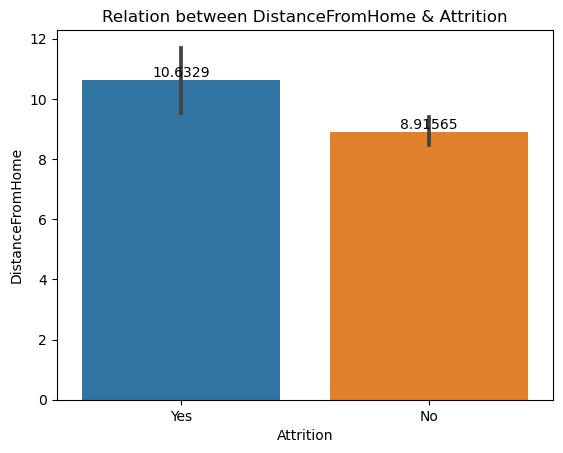

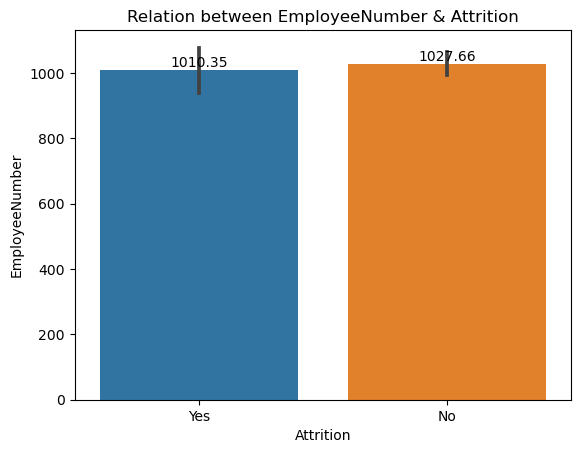

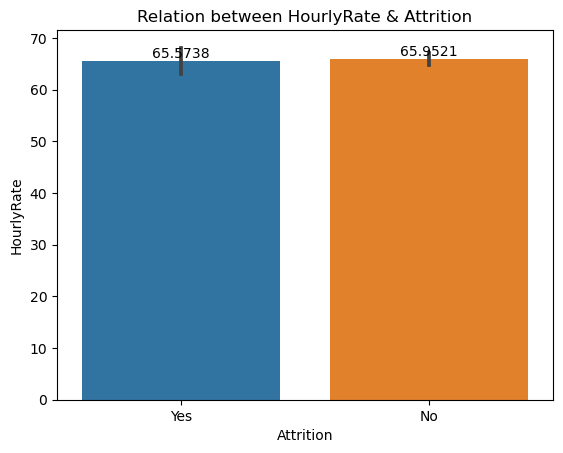

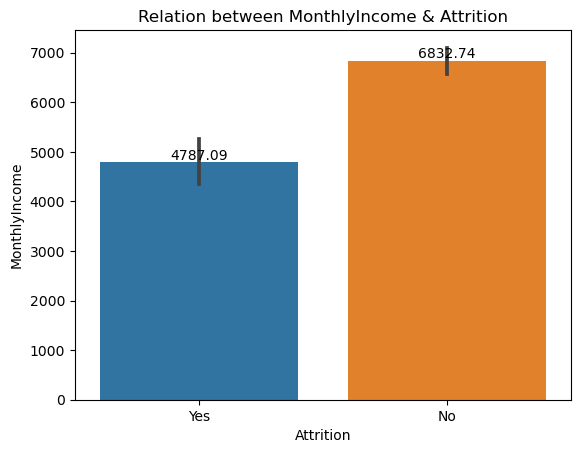

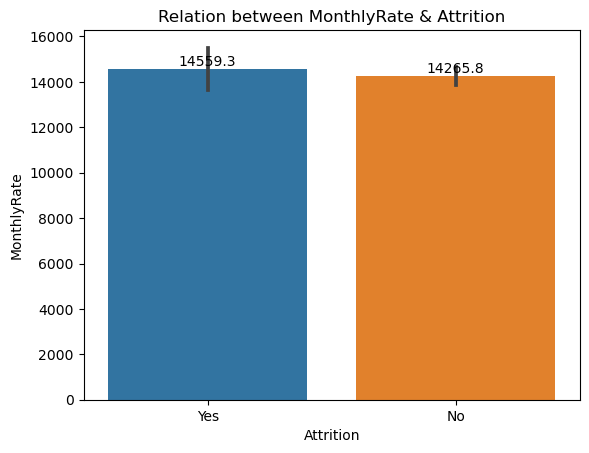

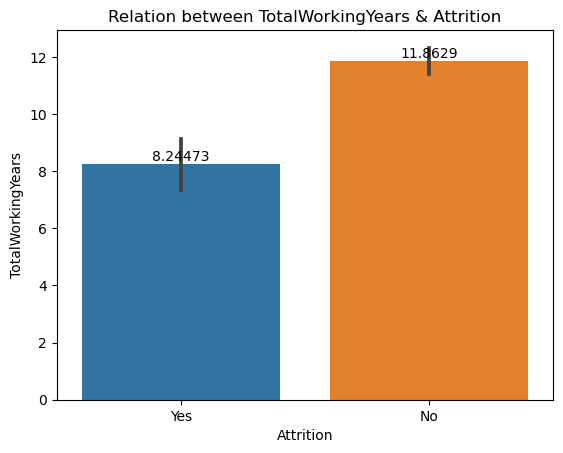

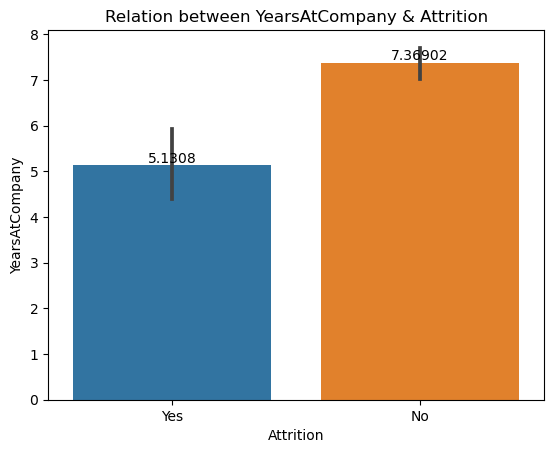

In [119]:
for i in con_col:
    plt.figure(i)
    ax = sns.barplot(data = df, x = target, y = i)
    plt.title('Relation between {} & Attrition'.format(i))
    
    for j in ax.containers:
        ax.bar_label(j)

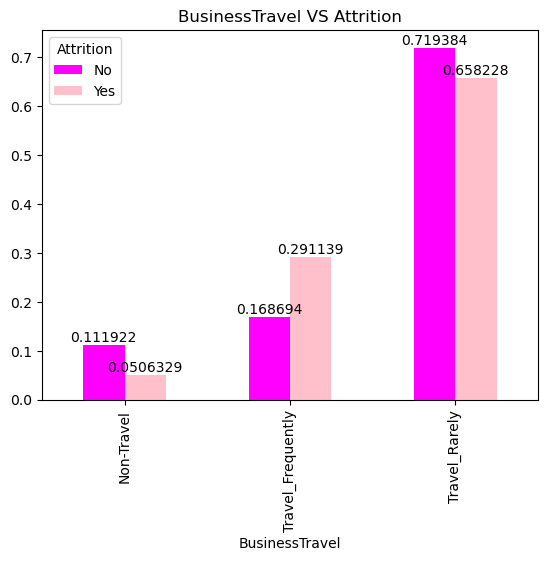

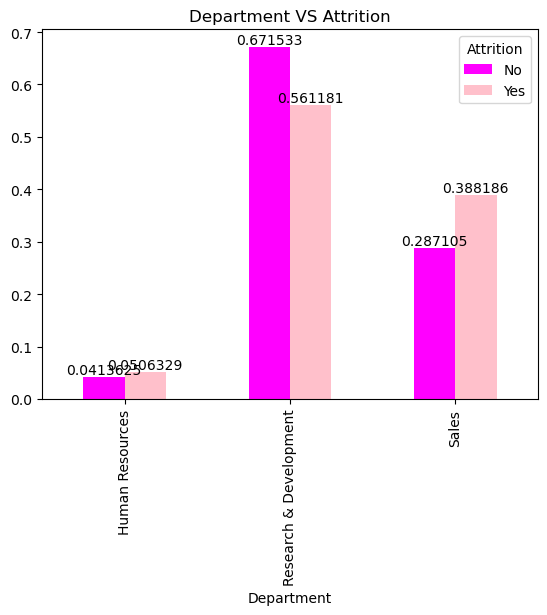

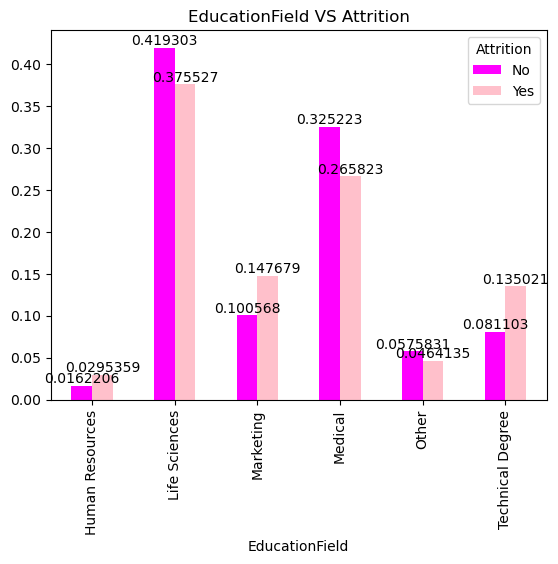

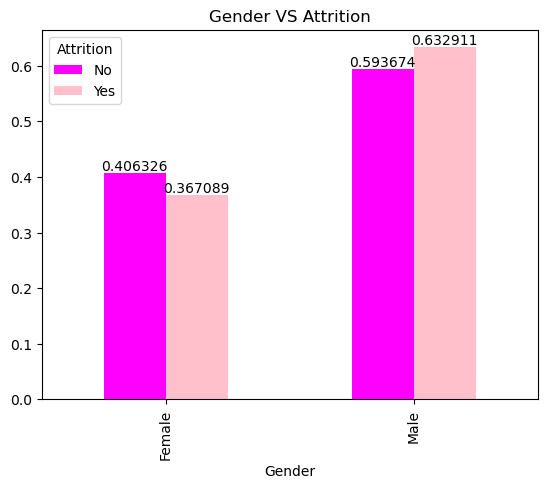

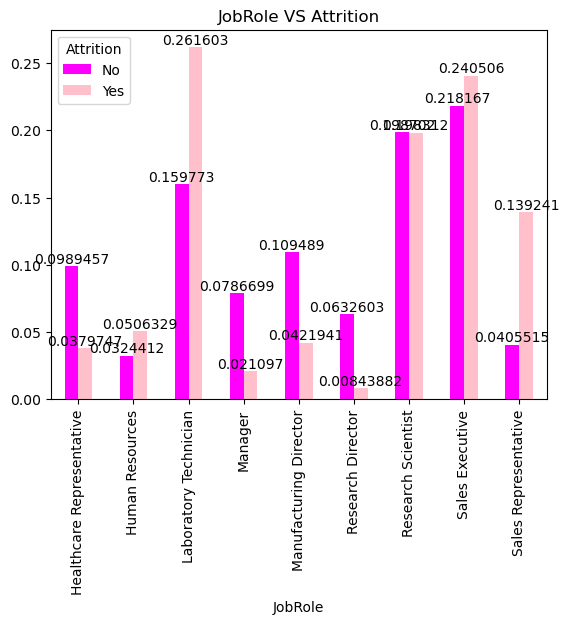

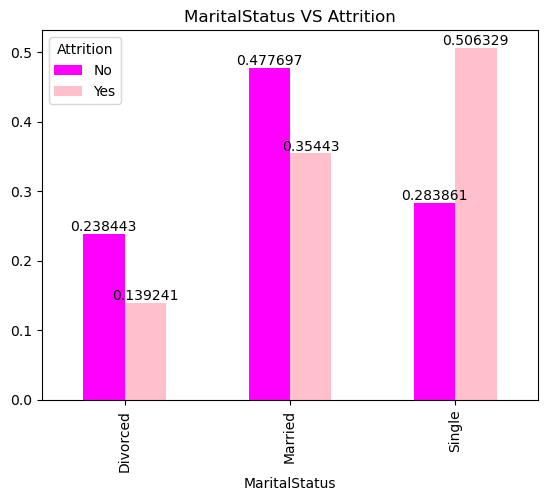

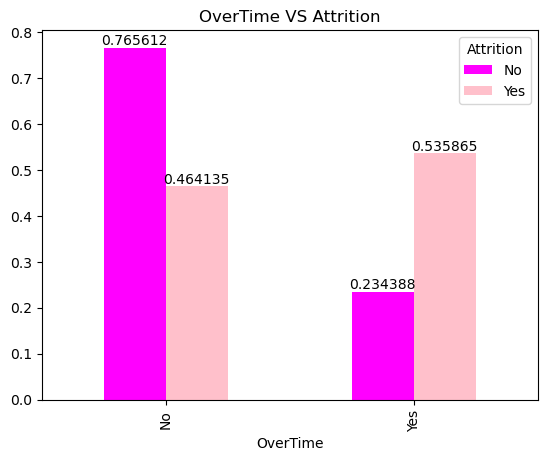

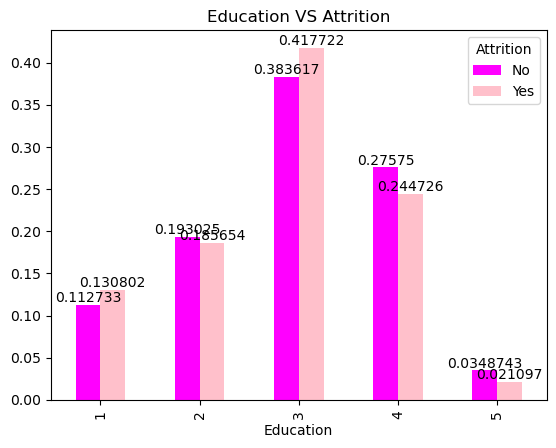

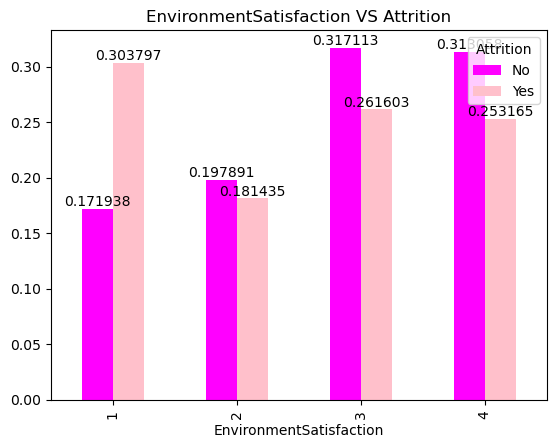

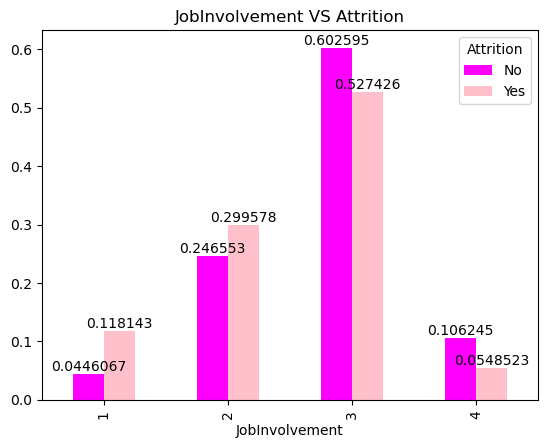

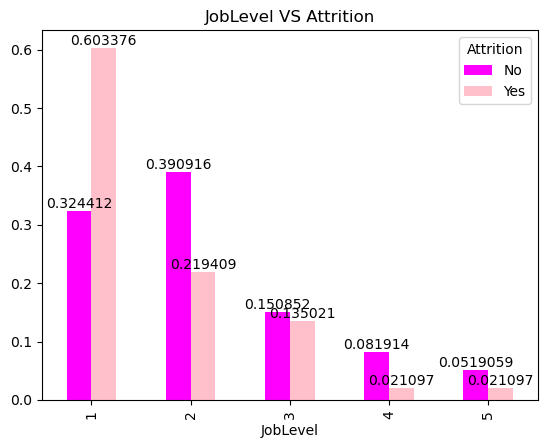

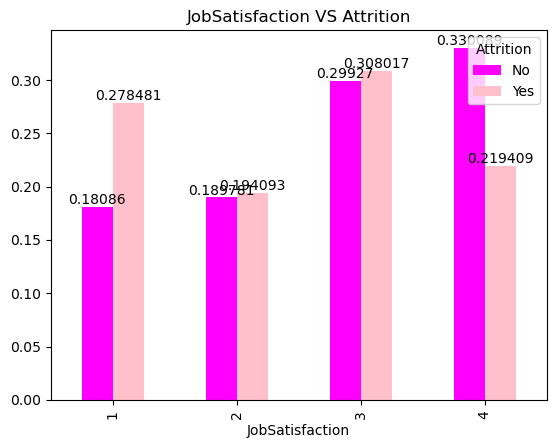

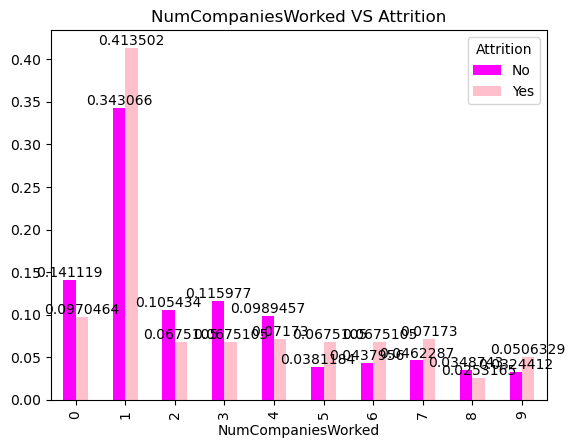

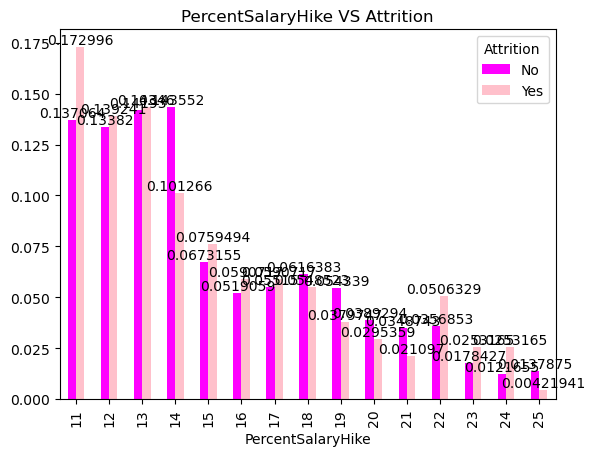

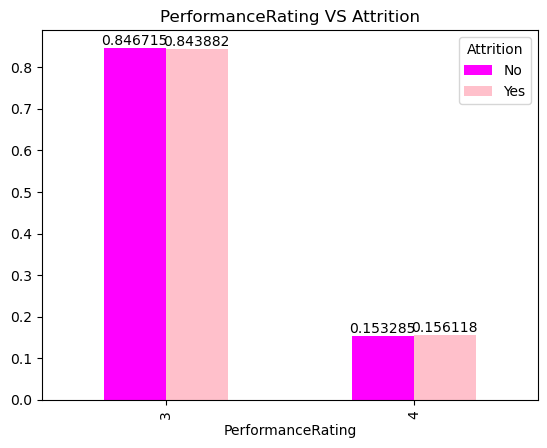

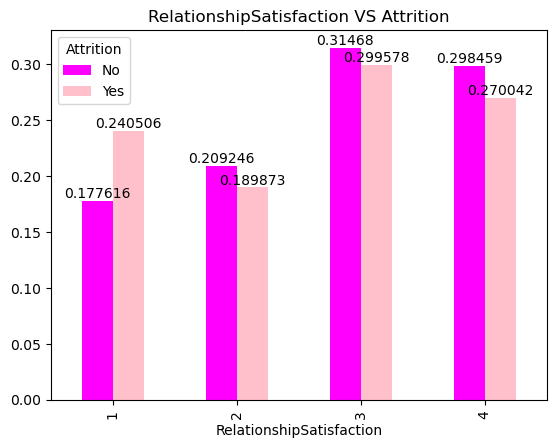

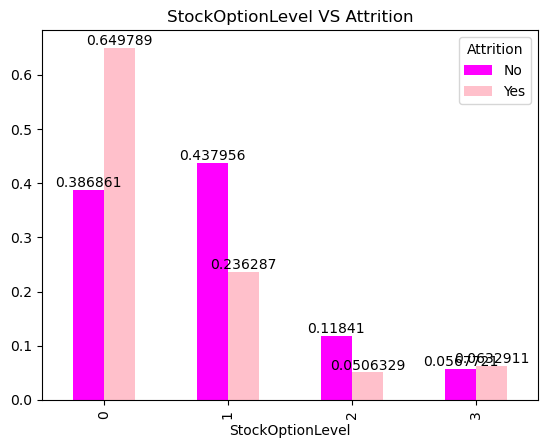

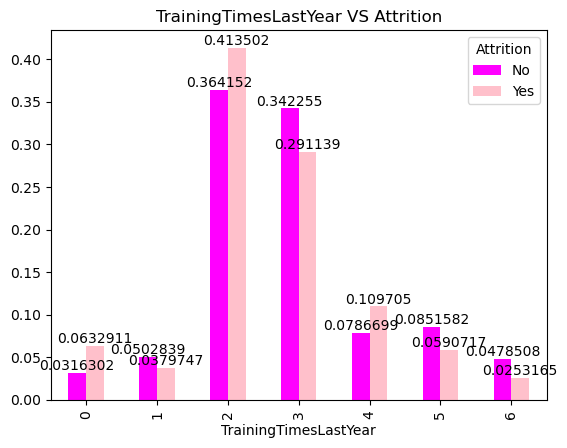

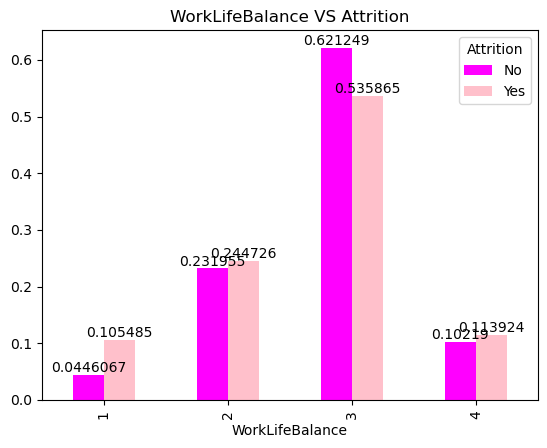

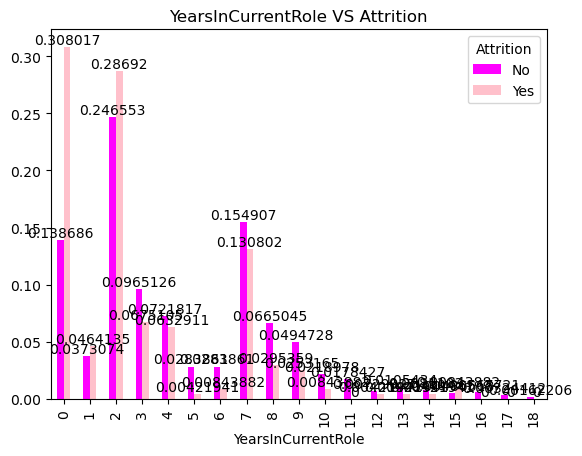

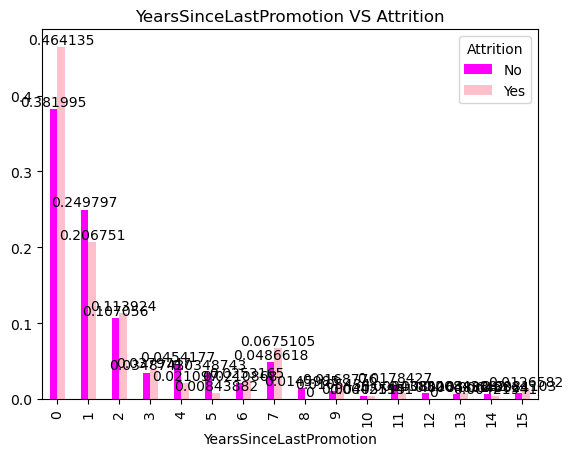

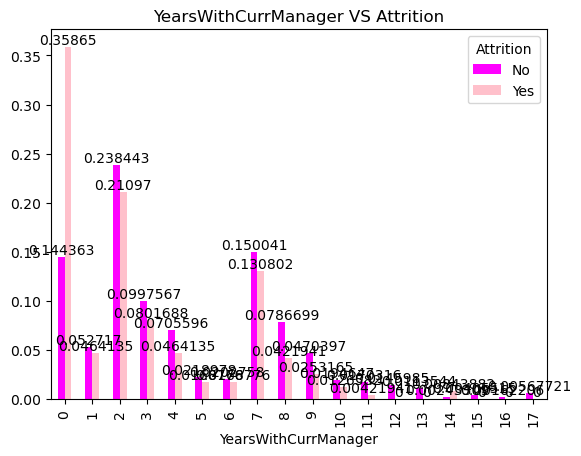

In [30]:

for i in cat_col_new:
    ax = pd.crosstab(index = df[i], columns = df[target], normalize = 'columns').plot.bar(color = ['magenta','pink'])
    plt.title(i+' VS '+target)
    
    for j in ax.containers:
        ax.bar_label(j)

In [3]:
df = pd.read_csv('Attrition_new.csv')

In [6]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

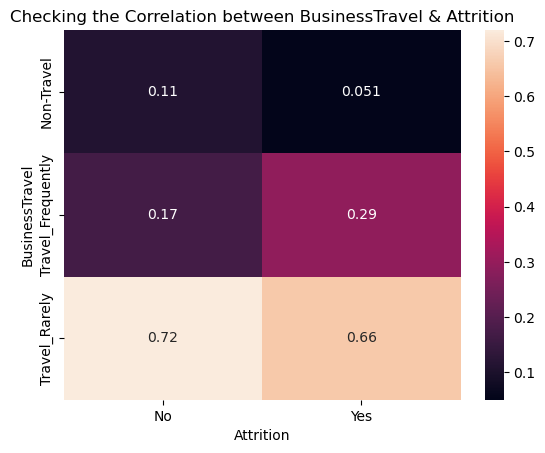

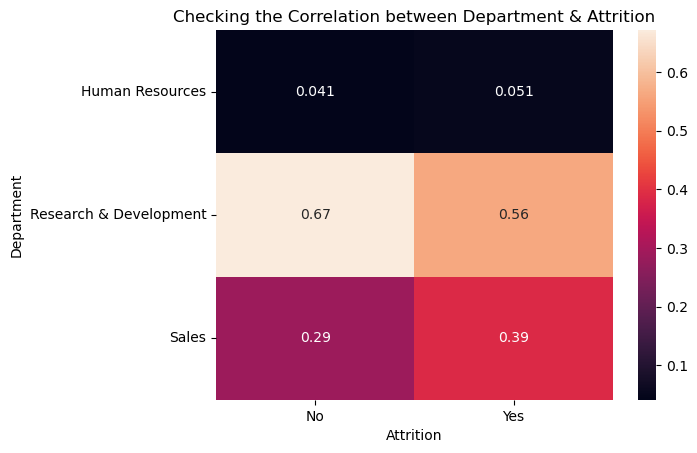

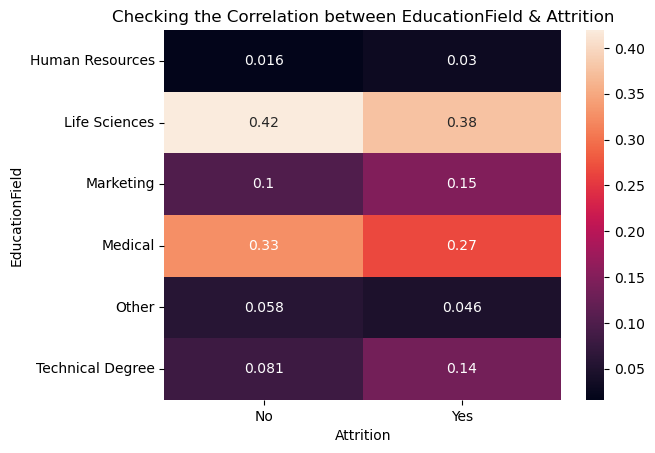

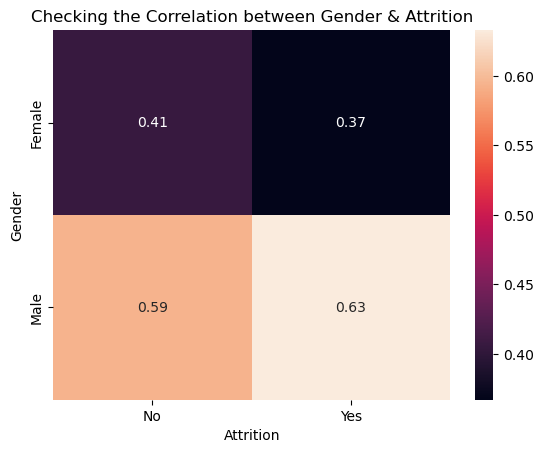

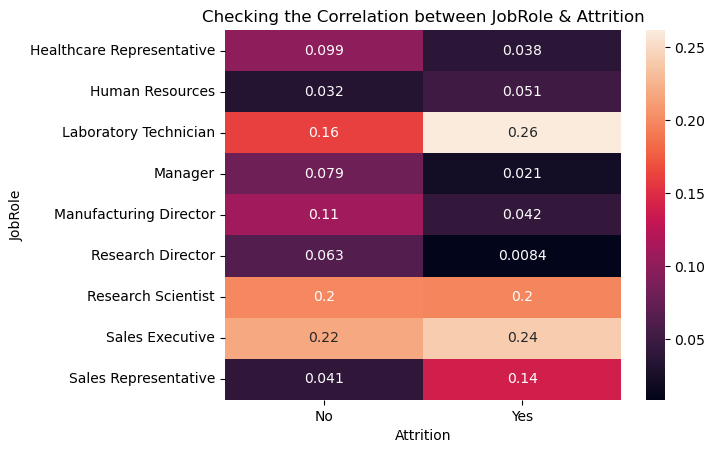

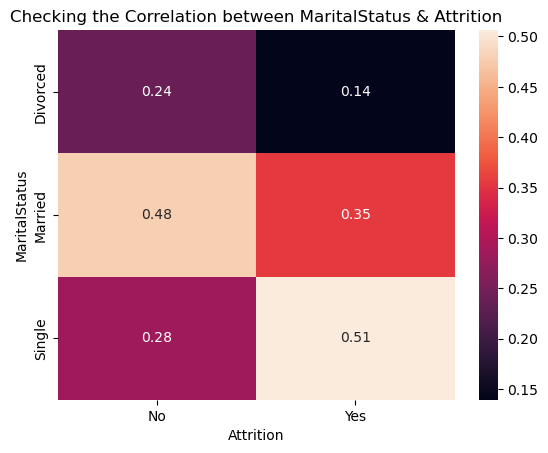

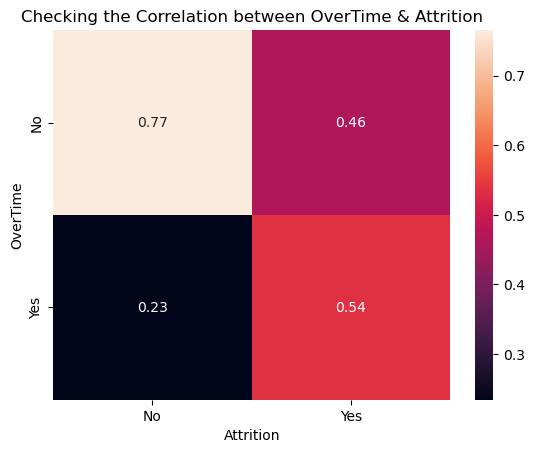

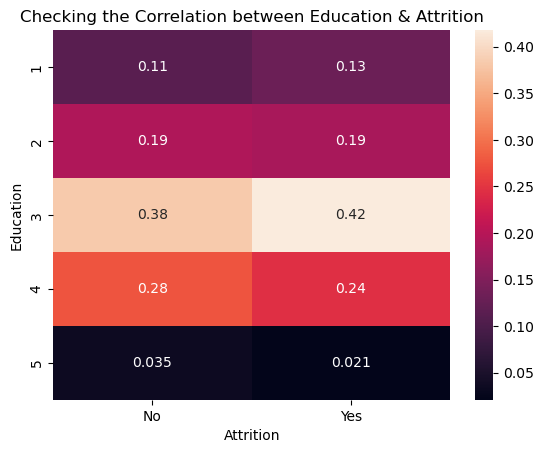

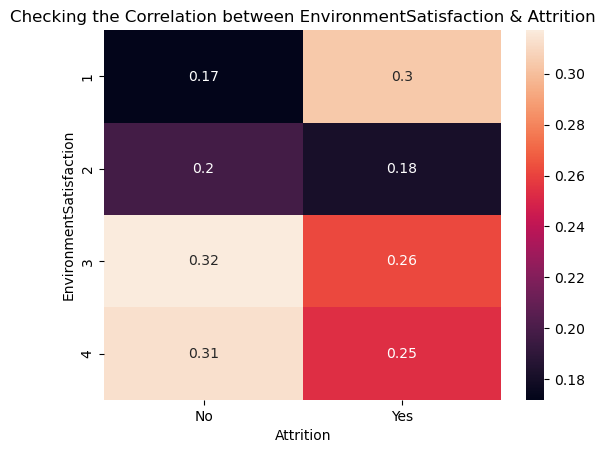

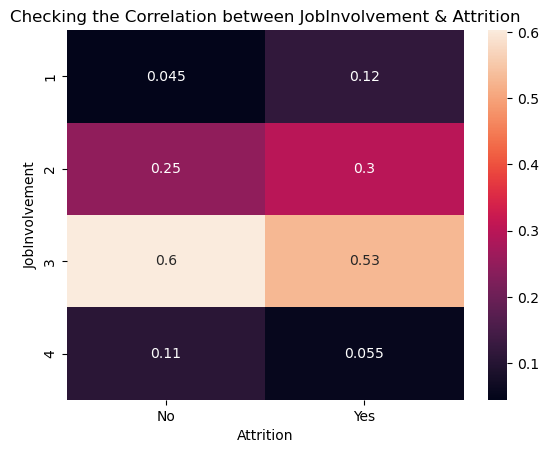

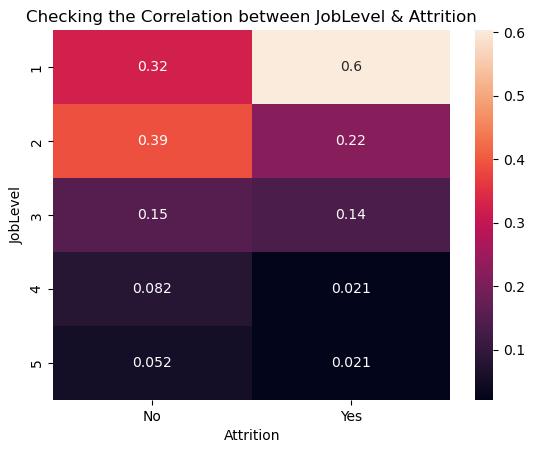

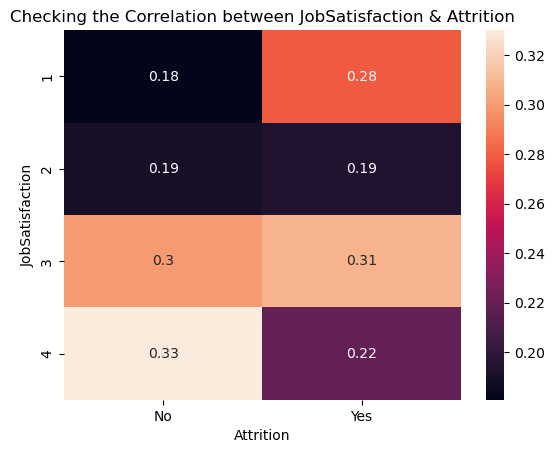

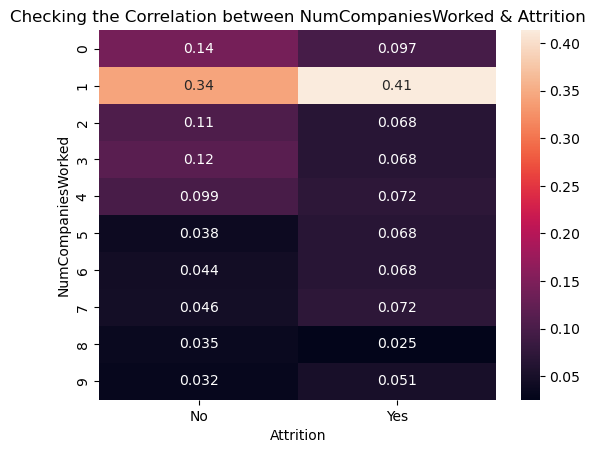

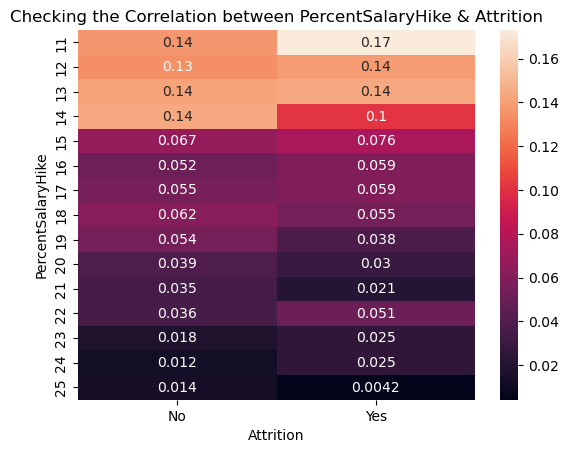

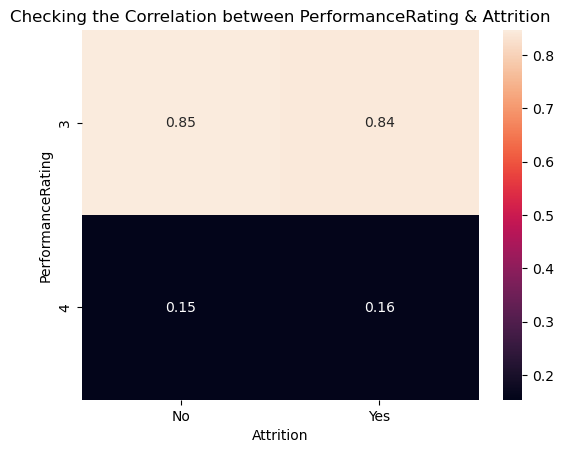

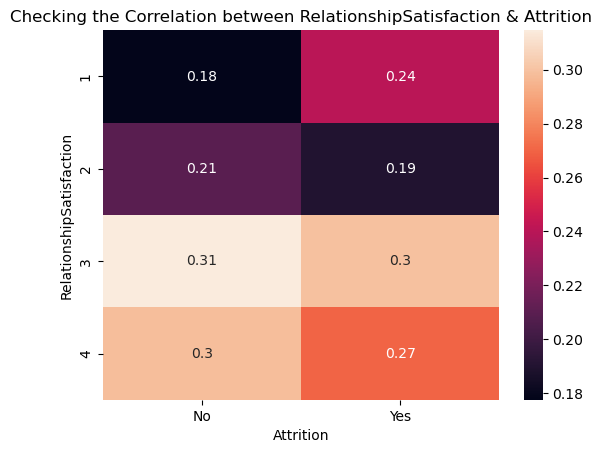

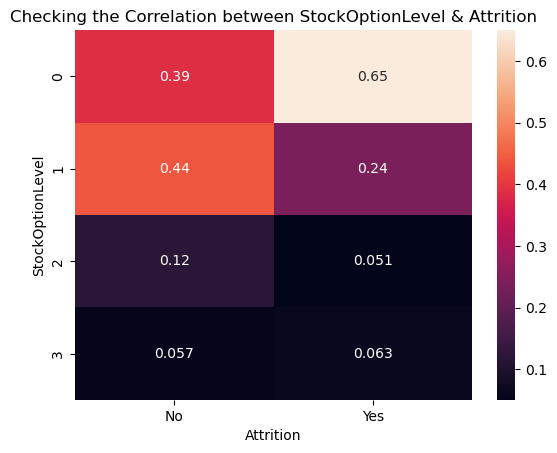

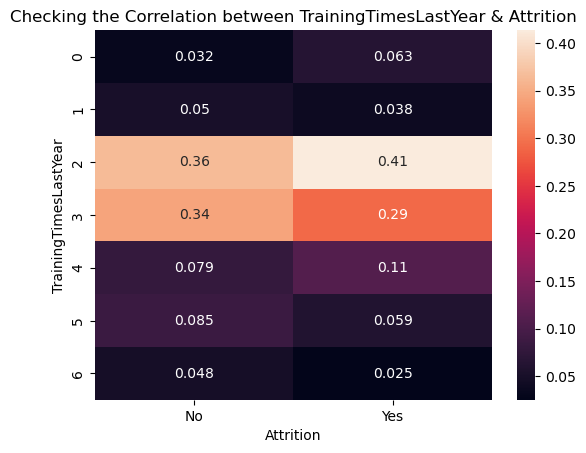

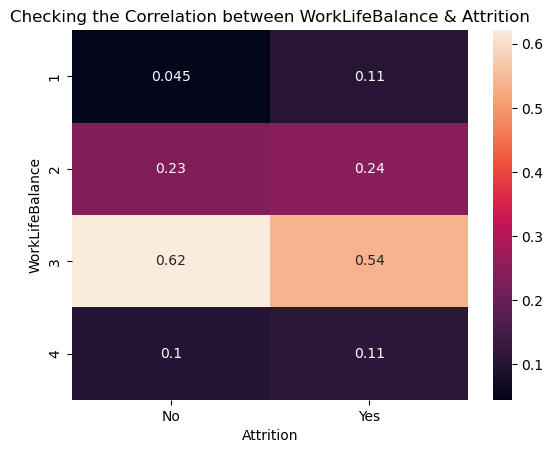

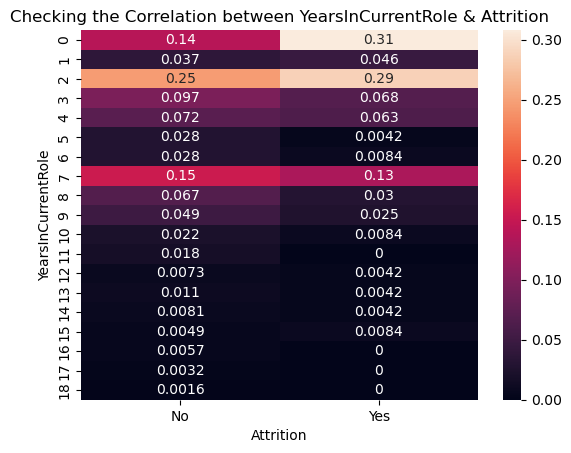

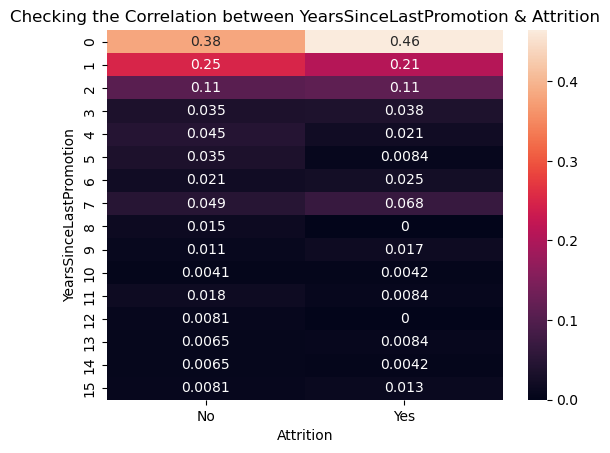

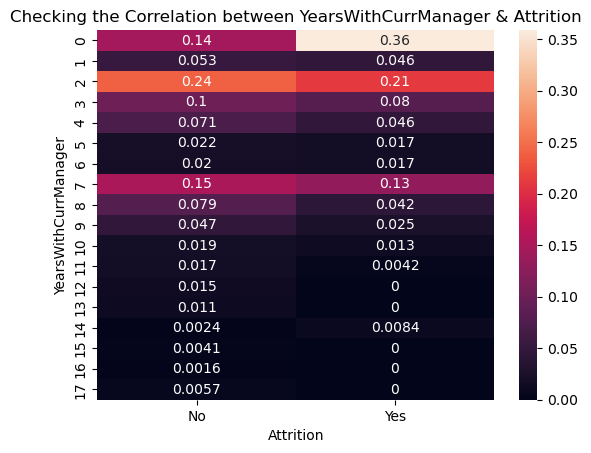

In [34]:
for i in cat_col_new:
    plt.figure()
    sns.heatmap(pd.crosstab(index = df[i], columns = df[target], normalize = 'columns'), annot = True)
    plt.title('Checking the Correlation between {} & {}'.format(i,target))

In [37]:
df.groupby('Attrition')['Age'].apply(list)

Attrition
No     [49, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 3...
Yes    [41, 37, 28, 36, 34, 32, 39, 24, 50, 26, 41, 4...
Name: Age, dtype: object

In [ ]:
## Feature Selection

In [46]:
def AnovaResult(inpdata,predictor,target):
    
    from scipy.stats import f_oneway
    selected_col = []
    
    for i in predictor:
        group = inpdata.groupby(target)[i].apply(list)
        
        anovaresult = f_oneway(*group)
        
        
        if anovaresult[1]<0.05:
            selected_col.append(i)
            print(i, 'is correlated with',target,'| P value is',anovaresult[1])
        else:
            print(i, 'is not correlated with',target,'| P value is',anovaresult[1])
    return(selected_col)
            

In [48]:
AnovaResult(inpdata = df,predictor = con_col,target = target)

Age is correlated with Attrition | P value is 8.356308021102401e-10
DailyRate is correlated with Attrition | P value is 0.02985816066026101
DistanceFromHome is correlated with Attrition | P value is 0.0027930600802132115
EmployeeNumber is not correlated with Attrition | P value is 0.685327589729904
HourlyRate is not correlated with Attrition | P value is 0.7931347689944519
MonthlyIncome is correlated with Attrition | P value is 7.147363985353002e-10
MonthlyRate is not correlated with Attrition | P value is 0.5611235982243229
TotalWorkingYears is correlated with Attrition | P value is 4.061878111266676e-11
YearsAtCompany is correlated with Attrition | P value is 2.3188716103859732e-07


['Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany']

In [44]:
def ChiSquare(inpdata, predictor, target):
    
    from scipy.stats import chi2_contingency
    
    selected_col1 = []
    
    for i in predictor:
        group = pd.crosstab(index = df[i], columns = df[target])
        
        chiresult = chi2_contingency(group)
        
        if chiresult[1]<0.05:
            selected_col1.append(i)
            print(i, 'is correlated with',target,'| P value is',chiresult[1])
        else:
            print(i, 'is not correlated with',target,'| P value is',chiresult[1])
    return(selected_col1)

In [45]:
ChiSquare(inpdata = df,predictor = cat_col_new,target = target)

BusinessTravel is correlated with Attrition | P value is 5.608614476449931e-06
Department is correlated with Attrition | P value is 0.004525606574479633
EducationField is correlated with Attrition | P value is 0.006773980139025212
Gender is not correlated with Attrition | P value is 0.29057244902890855
JobRole is correlated with Attrition | P value is 2.752481638050657e-15
MaritalStatus is correlated with Attrition | P value is 9.45551106034083e-11
OverTime is correlated with Attrition | P value is 8.15842372153832e-21
Education is not correlated with Attrition | P value is 0.5455253376565949
EnvironmentSatisfaction is correlated with Attrition | P value is 5.1234689062894205e-05
JobInvolvement is correlated with Attrition | P value is 2.8631806367134195e-06
JobLevel is correlated with Attrition | P value is 6.634684715458957e-15
JobSatisfaction is correlated with Attrition | P value is 0.0005563004510387556
NumCompaniesWorked is correlated with Attrition | P value is 0.002249178294685

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [ ]:
### Final Selected Columns are as below

In [53]:
Final_Col = ['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsWithCurrManager','Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany']

In [54]:
target

'Attrition'

In [55]:
DataforML_HR = df[Final_Col]

In [58]:
DataforML_HR['Attrition'] = df['Attrition']

In [59]:
DataforML_HR.head()

BusinessTravel              Department EducationField  \
0      Travel_Rarely                   Sales  Life Sciences   
1  Travel_Frequently  Research & Development  Life Sciences   
2      Travel_Rarely  Research & Development          Other   
3  Travel_Frequently  Research & Development  Life Sciences   
4      Travel_Rarely  Research & Development        Medical   

                 JobRole MaritalStatus OverTime  EnvironmentSatisfaction  \
0        Sales Executive        Single      Yes                        2   
1     Research Scientist       Married       No                        3   
2  Laboratory Technician        Single      Yes                        4   
3     Research Scientist       Married      Yes                        4   
4  Laboratory Technician       Married       No                        1   

   JobInvolvement  JobLevel  JobSatisfaction  ...  WorkLifeBalance  \
0               3         2                4  ...                1   
1               2         2                2  ...                3   
2               2         1                3  ...                3   
3               3         1                3  ...                3   
4               3         1                2  ...                3   

   YearsInCurrentRole  YearsWithCurrManager  Age  DailyRate  DistanceFromHome  \
0                   4                     5   41       1102                 1   
1                   7                     7   49        279                 8   
2                   0                     0   37       1373                 2   
3                   7                     0   33       1392                 3   
4                   2                     2   27        591                 2   

   MonthlyIncome  TotalWorkingYears  YearsAtCompany  Attrition  
0           5993                  8               6        Yes  
1           5130                 10              10         No  
2           2090                  7               0        Yes  
3           2909                  8               8         No  
4           3468                  6               2         No  

[5 rows x 23 columns]

In [60]:
DataforML_HR.to_pickle('DataforML_HR.pkl')

In [3]:
DataforML = pd.read_pickle('DataforML_HR.pkl')

In [4]:
DataforML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BusinessTravel           1470 non-null   object
 1   Department               1470 non-null   object
 2   EducationField           1470 non-null   object
 3   JobRole                  1470 non-null   object
 4   MaritalStatus            1470 non-null   object
 5   OverTime                 1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  StockOptionLevel         1470 non-null   int64 
 12  TrainingTimesLastYear    1470 non-null   int64 
 13  WorkLifeBalance          1470 non-null   int64 
 14  YearsInCurrentRole       1470 non-null  

In [5]:
X = DataforML.drop(columns = ['Attrition'])

In [6]:
y = DataforML['Attrition']

In [7]:
from sklearn.compose import ColumnTransformer

In [8]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [9]:
trans = ColumnTransformer(transformers = [
    ('trans1', FunctionTransformer(func = np.log1p), ['MonthlyIncome','TotalWorkingYears','YearsAtCompany']),
    ('trans2',OneHotEncoder(sparse = False,drop = 'first'),['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime'])                     
],remainder = 'passthrough')

In [10]:
X_transform = trans.fit_transform(X)

In [11]:
X_transform.shape

(1470, 36)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
predictor = StandardScaler()

In [14]:
X_transform = predictor.fit_transform(X_transform)

In [15]:
X_transform.shape

(1470, 36)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
predictor_target = LabelEncoder()

In [18]:
y_transform = predictor_target.fit_transform(y)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test =  train_test_split(X_transform,y_transform, test_size = 0.30, random_state = 22)

In [ ]:
##Logistic Regression

In [82]:
LR = LogisticRegression()

In [83]:
param_log = {
    'C':[1,3,5,7],
    'penalty':['l1','l2'],
    'solver':['newton-cg','sag','saga','lbfs','liblinear']
}

In [84]:
GridSearch = GridSearchCV(LR, param_log, cv = 5, n_jobs = 1)

In [85]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [86]:
print(GridSearch_result.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [87]:
print(GridSearch_result.best_score_)

0.8853279659010184


In [ ]:
## Decision Tree Classifier

In [38]:
DT = DecisionTreeClassifier()

In [39]:
param_dt = {
    'max_depth':[1,3,5,7],
    'criterion':['gini','entropy']
}

In [40]:
GridSearch = GridSearchCV(DT, param_dt, cv = 5, n_jobs = 1)

In [41]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [42]:
print(GridSearch_result.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [43]:
print(GridSearch_result.best_score_)

0.8619891072697135


In [44]:
## Random Forest

In [45]:
RF = RandomForestClassifier()

In [46]:
param_rf = {
    'max_depth':[1,3,5,7],
    'criterion':['gini','entropy'],
    'n_estimators':[100,200]
}

In [47]:
GridSearch = GridSearchCV(RF, param_rf, cv = 5, n_jobs = 1)

In [48]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [49]:
print(GridSearch_result.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}


In [50]:
print(GridSearch_result.best_score_)

0.8726781908595787


In [ ]:
## Adaboost

In [53]:
AB = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 3))

In [54]:
param_ab = {
    'learning_rate':[0.01,0.03,0.05],
    'n_estimators':[100,200]
}

In [55]:
GridSearch = GridSearchCV(AB, param_ab, cv = 5, n_jobs = 1)

In [56]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [57]:
print(GridSearch_result.best_params_)

{'learning_rate': 0.05, 'n_estimators': 200}


In [58]:
print(GridSearch_result.best_score_)

0.8775420317309969


In [ ]:
## XGBoost

In [88]:
XGB = XGBClassifier()

In [89]:
param_xgb = {
    'learning_rate':[0.01,0.03,0.05],
    'n_estimators':[100,200],
    'max_depth':[1,3,5],
    'objective':['reg:linear'],
    'booster':['gbtree','gblinear']
}

In [90]:
GridSearch = GridSearchCV(XGB, param_xgb, cv = 5, n_jobs = 1)

In [91]:
GridSearch_result = GridSearch.fit(X_train,y_train)

[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

In [92]:
print(GridSearch_result.best_params_)

{'booster': 'gblinear', 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100, 'objective': 'reg:linear'}


In [93]:
print(GridSearch_result.best_score_)

0.8872555055647645


In [94]:
## KNN

In [95]:
KNN = KNeighborsClassifier()

In [96]:
param_knn = {
    'n_neighbors':[1,3,5,7,9]
}

In [97]:
GridSearch = GridSearchCV(KNN, param_knn, cv = 5, n_jobs = 1)

In [98]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [99]:
print(GridSearch_result.best_params_)

{'n_neighbors': 7}


In [100]:
print(GridSearch_result.best_score_)

0.8629694529955009


In [101]:
##SVM

In [22]:
SVM = SVC(gamma = 'auto')

In [24]:
param_svm = {
    'C':[10,20,30, 40],
    'kernel':['rbf', 'linear','poly']
}

In [27]:
GridSearch = GridSearchCV(SVM, param_svm, cv = 5, n_jobs = 1)

In [28]:
GridSearch_result = GridSearch.fit(X_train,y_train)

In [29]:
print(GridSearch_result.best_params_)

{'C': 30, 'kernel': 'linear'}


In [109]:
print(GridSearch_result.best_score_)

0.8863035756571158


In [30]:
model = {
    'LogisticRegression': LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear'),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'gini', max_depth= 3),
    'RandomForestClassifier': RandomForestClassifier(criterion = 'gini', max_depth = 7, n_estimators =  100),
    'AdaBoostClassifier': AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 3),learning_rate= 0.05, n_estimators= 200),
    'XGBClassifier': XGBClassifier(booster= 'gblinear', learning_rate= 0.01, max_depth= 1, n_estimators= 100, objective= 'reg:linear'),
    'KNN': KNeighborsClassifier(n_neighbors= 7),
    'SVM': SVC(gamma = 'auto',C= 30, kernel= 'linear')
}

In [39]:
for i,j in model.items():
    print(i)
    clf = j.fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)
    
    from sklearn import metrics
    
    print(metrics.classification_report(y_test,y_pred))
    print(metrics.confusion_matrix(y_test,y_pred))
    
    print('Accuracy F1-Score',metrics.f1_score(y_test,y_pred, average = 'weighted'))
    
    from sklearn.model_selection import cross_val_score
    
    Accuracy_Values=cross_val_score(clf, X_transform , y_transform, cv=5, scoring='f1_weighted')
    print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
    print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       361
           1       0.85      0.41      0.55        80

    accuracy                           0.88       441
   macro avg       0.86      0.70      0.74       441
weighted avg       0.88      0.88      0.86       441

[[355   6]
 [ 47  33]]
Accuracy F1-Score 0.8623440638815596

Accuracy values for 5-fold Cross Validation:
 [0.86096235 0.85999051 0.8600499  0.86053918 0.8810024 ]

Final Average Accuracy of the model: 0.86
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       361
           1       0.75      0.07      0.14        80

    accuracy                           0.83       441
   macro avg       0.79      0.53      0.52       441
weighted avg       0.81      0.83      0.76       441

[[359   2]
 [ 74   6]]
Accuracy F1-Score 0.7649771762762047

Accuracy values for 5-fold Cross Val

Selected Model is SVM

In [42]:
trans = ColumnTransformer(transformers = [
    ('trans1', FunctionTransformer(func = np.log1p), ['MonthlyIncome','TotalWorkingYears','YearsAtCompany']),
    ('trans2',OneHotEncoder(sparse = False,drop = 'first'),['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime'])                     
],remainder = 'passthrough')

In [43]:
SD = StandardScaler()

In [44]:
svm = SVC(gamma = 'auto',C= 30, kernel= 'linear')

In [40]:
from sklearn.pipeline import make_pipeline

In [45]:
pipe = make_pipeline(trans,SD,svm)

In [46]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trans1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['MonthlyIncome',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany']),
                                                 ('trans2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus',
                                                   'OverTime'])])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=30, gamma='auto', kernel='linear'))])

In [47]:
y_pred = pipe.predict(X)

In [48]:
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [53]:
pipe.predict(pd.DataFrame(data = [['Travel_Frequently','Sales','Life Sciences','Sales Executive','Single','Yes',2,3,2,4,8,0,0,1,4,5,41,1102,1,5993,8,6]], columns = ['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsWithCurrManager','Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany']))

array(['Yes'], dtype=object)

In [54]:
import pickle

pickle.dump(pipe,open('SVM_Attrition.pkl','wb'))

In [3]:
def FinalSelection(InpData):
    
    import pandas as pd
    from sklearn.compose import ColumnTransformer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import OneHotEncoder
    
   
    X = InpData
    
    import pickle
    
    with open('SVM_Attrition.pkl','rb') as readFileStream:
        predicted_model = pickle.load(readFileStream)
        readFileStream.close()
        
        
    prediction = predicted_model.predict(X)    
    
    predictionresult = pd.DataFrame(data = prediction, columns = ['Attrition'])
    
    
    return(predictionresult)

In [1]:
import pandas as pd
import numpy as np


In [4]:
new_data = pd.read_csv("E:\Meri Skill\Project 3\Attrition_test.csv")

In [9]:
FinalSelection(InpData = new_data)

Attrition
0          Yes
1           No
2           No
3           No
4           No
...        ...
1465        No
1466        No
1467        No
1468        No
1469        No

[1470 rows x 1 columns]